In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
project_path = '/content/drive/MyDrive/Labelled_Multiclass_Dataset'
os.chdir(project_path)

In [ ]:
!ls

amazonAlexa_Multi.csv			    GosungLight2_Multi.csv   phillipsHub_Multi.csv
combined_data_updated.csv		    kasaSmartPlug_Multi.csv  RingDoorbell_Multi.csv
combined_data_without_okpVacc.csv	    longPlus-Cam_Multi.csv   roborockVacc_Multi.csv
combined_data_without_okpVacc_modified.csv  nestCam_Multi.csv
googleNestMini_Multi.csv		    okpVacc_Multi.csv


In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Labelled_Multiclass_Dataset/combined_data_without_okpVacc_modified.csv')

In [ ]:
data.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
drop_columns = [
    "id"
   ]
data.drop(columns=drop_columns, inplace=True, errors='ignore')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106972 entries, 0 to 106971
Data columns (total 85 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   device_id          106972 non-null  int64  
 1   session_id         106972 non-null  object 
 2   src_ip             106972 non-null  object 
 3   dst_ip             106972 non-null  object 
 4   src_port           106972 non-null  int64  
 5   dst_port           106972 non-null  int64  
 6   protocol           106972 non-null  int64  
 7   timestamp          106972 non-null  object 
 8   flow_duration      106972 non-null  int64  
 9   flow_byts_s        106972 non-null  float64
 10  flow_pkts_s        106972 non-null  float64
 11  fwd_pkts_s         106972 non-null  float64
 12  bwd_pkts_s         106972 non-null  float64
 13  tot_fwd_pkts       106972 non-null  int64  
 14  tot_bwd_pkts       106972 non-null  int64  
 15  totlen_fwd_pkts    106972 non-null  int64  
 16  to

In [ ]:
drop_columns = [
    "device_id", "session_id", "src_ip", "dst_ip", "src_port", "protocol", "timestamp",
   ]
data.drop(columns=drop_columns, inplace=True, errors='ignore')

In [ ]:
# Identifying missing values
missing_val = data.isna().sum()
print(missing_val.loc[missing_val > 0])

Series([], dtype: int64)


In [ ]:
# Checking for infinity values
numeric_cols = data.select_dtypes(include = np.number).columns
inf_count = np.isinf(data[numeric_cols]).sum()
print(inf_count[inf_count > 0])

Series([], dtype: int64)


In [ ]:
# Replacing any infinite values (positive or negative) with NaN (not a number)
print(f'Initial missing values: {data.isna().sum().sum()}')

data.replace([np.inf, -np.inf], np.nan, inplace = True)

print(f'Missing values after processing infinite values: {data.isna().sum().sum()}')

Initial missing values: 0
Missing values after processing infinite values: 0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


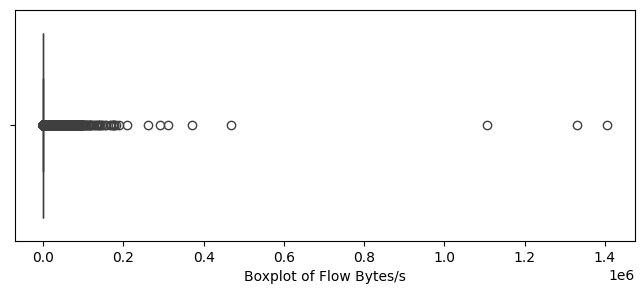

In [ ]:
plt.figure(figsize = (8, 3))
sns.boxplot(x = data['flow_byts_s'])
plt.xlabel('Boxplot of Flow Bytes/s')
plt.show()

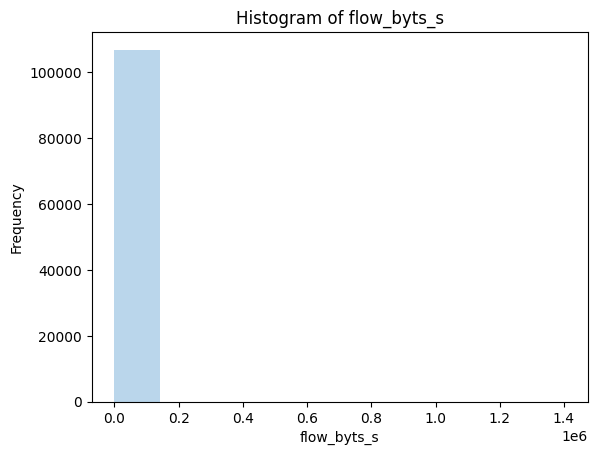

In [ ]:
colors = sns.color_palette('Blues')
plt.hist(data['flow_byts_s'], color = colors[1])
plt.title('Histogram of flow_byts_s')
plt.xlabel('flow_byts_s')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


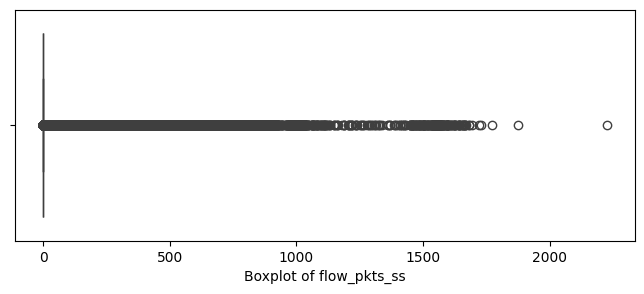

In [ ]:
plt.figure(figsize = (8, 3))
sns.boxplot(x = data['flow_pkts_s'])
plt.xlabel('Boxplot of flow_pkts_ss')
plt.show()

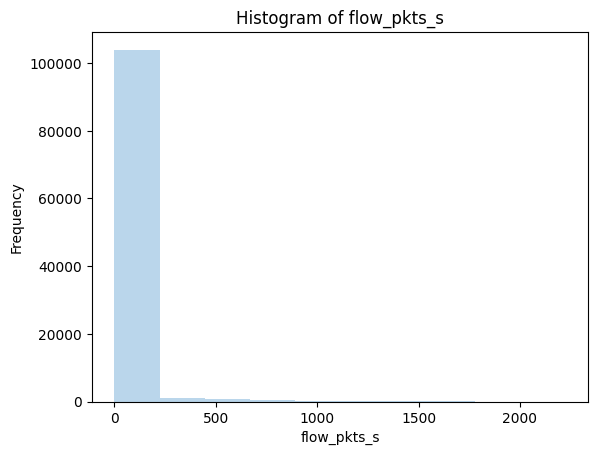

In [ ]:
plt.hist(data['flow_pkts_s'], color = colors[1])
plt.title('Histogram of flow_pkts_s')
plt.xlabel('flow_pkts_s')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


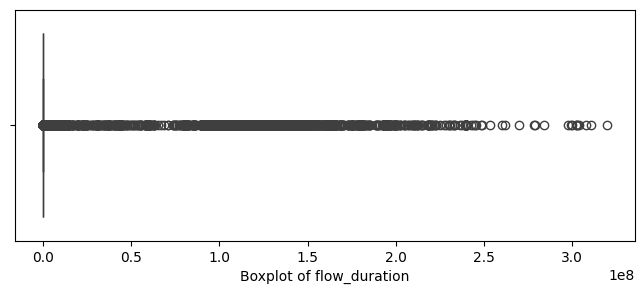

In [ ]:
plt.figure(figsize = (8, 3))
sns.boxplot(x = data['flow_duration'])
plt.xlabel('Boxplot of flow_duration')
plt.show()

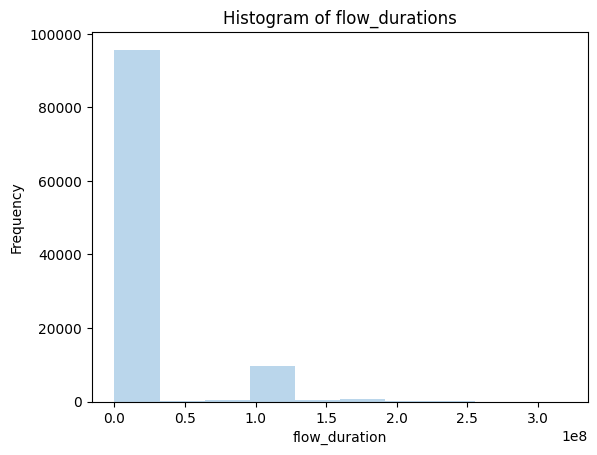

In [ ]:
plt.hist(data['flow_duration'], color = colors[1])
plt.title('Histogram of flow_durations')
plt.xlabel('flow_duration')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print('Number of \'flow_byts_s\' missing values:', data['flow_byts_s'].isna().sum())
print('Number of \'flow_pkts_s\' missing values:', data['flow_pkts_s'].isna().sum())

Number of 'flow_byts_s' missing values: 0
Number of 'flow_pkts_s' missing values: 0


In [ ]:
data['Label'].unique()

array(['Benign', 'XMasAttack', 'TCPAttack', 'UDPAttack', 'HTTPAttack'],
      dtype=object)

In [ ]:
data['Label'].value_counts()

Label
Benign        96763
XMasAttack     3008
UDPAttack      2701
TCPAttack      2700
HTTPAttack     1800
Name: count, dtype: int64

In [ ]:
# Byte, Packet ratio
# Avoid division by zero with small epsilon (1e-9)
epsilon = 1e-9

# Byte Ratio (Forward / Backward)
data['byte_ratio'] = data['totlen_fwd_pkts'] / (data['totlen_bwd_pkts'] + epsilon)

# Packet Ratio (Forward / Backward)
data['pkt_ratio'] = data['tot_fwd_pkts'] / (data['tot_bwd_pkts'] + epsilon)

In [ ]:
# Flow directional ratio
# Directional Packet Ratio
data['directional_pkt_ratio'] = data['tot_fwd_pkts'] / (data['tot_fwd_pkts'] + data['tot_bwd_pkts'] + epsilon)

# Directional Byte Ratio
data['directional_byte_ratio'] = data['totlen_fwd_pkts'] / (data['totlen_fwd_pkts'] + data['totlen_bwd_pkts'] + epsilon)

In [ ]:
# Creating a new column BinLabel
data['BinLabel'] = data['Label'].apply(lambda x: 0 if x == 'Benign' else 1)

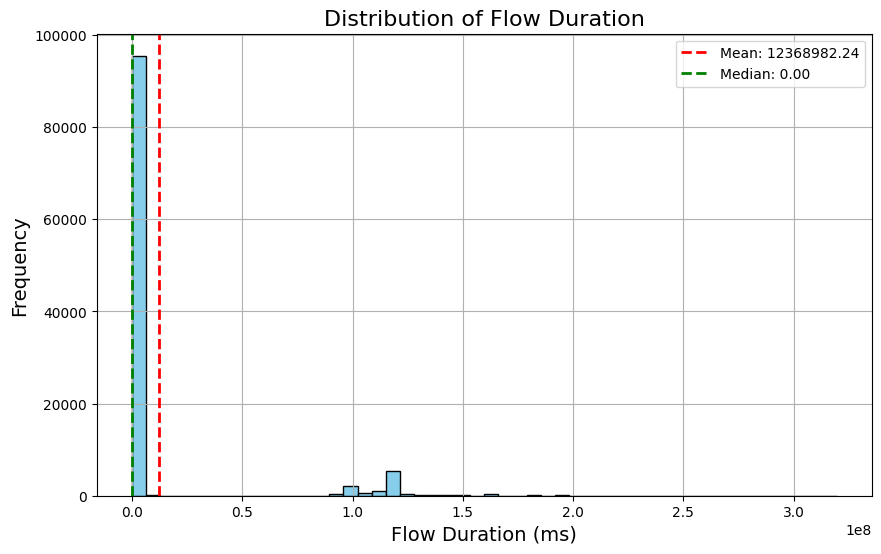

In [ ]:
import matplotlib.pyplot as plt

# Create the histogram
plt.figure(figsize=(10, 6))  # Optional: Set figure size for better visibility
data['flow_duration'].hist(bins=50, color='skyblue', edgecolor='black')

# Label the x-axis and y-axis
plt.xlabel('Flow Duration (ms)', fontsize=14)  # Set x-axis label with units (if applicable)
plt.ylabel('Frequency', fontsize=14)  # Set y-axis label

# Add a title to the histogram
plt.title('Distribution of Flow Duration', fontsize=16)

# Add lines for the mean and median (optional)
mean_duration = data['flow_duration'].mean()
median_duration = data['flow_duration'].median()

plt.axvline(mean_duration, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_duration:.2f}')
plt.axvline(median_duration, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_duration:.2f}')

# Add a legend to the plot (optional)
plt.legend()

# Show the plot
plt.show()

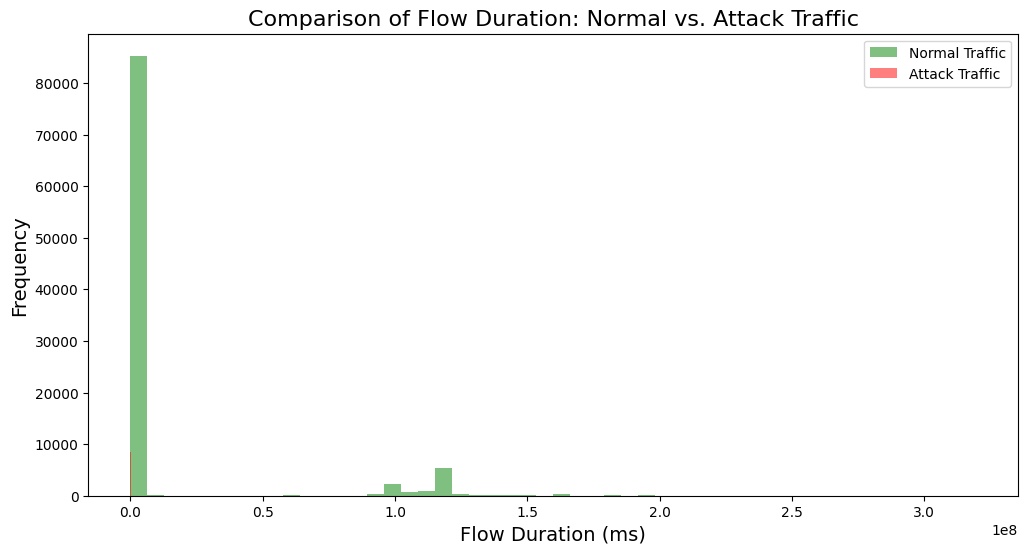

In [ ]:
import matplotlib.pyplot as plt

# Separate the data into normal traffic and attack traffic
normal_traffic = data[data['BinLabel'] == 0]  # Assuming '0' is normal traffic
attack_traffic = data[data['BinLabel'] != 0]  # Non-zero labels are attack types

# Plot histograms for flow_duration
plt.figure(figsize=(12, 6))

# Normal traffic distribution
plt.hist(normal_traffic['flow_duration'], bins=50, alpha=0.5, label='Normal Traffic', color='green')

# Attack traffic distribution
plt.hist(attack_traffic['flow_duration'], bins=50, alpha=0.5, label='Attack Traffic', color='red')

# Label the axes
plt.xlabel('Flow Duration (ms)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add a title and legend
plt.title('Comparison of Flow Duration: Normal vs. Attack Traffic', fontsize=16)
plt.legend()

# Show the plot
plt.show()

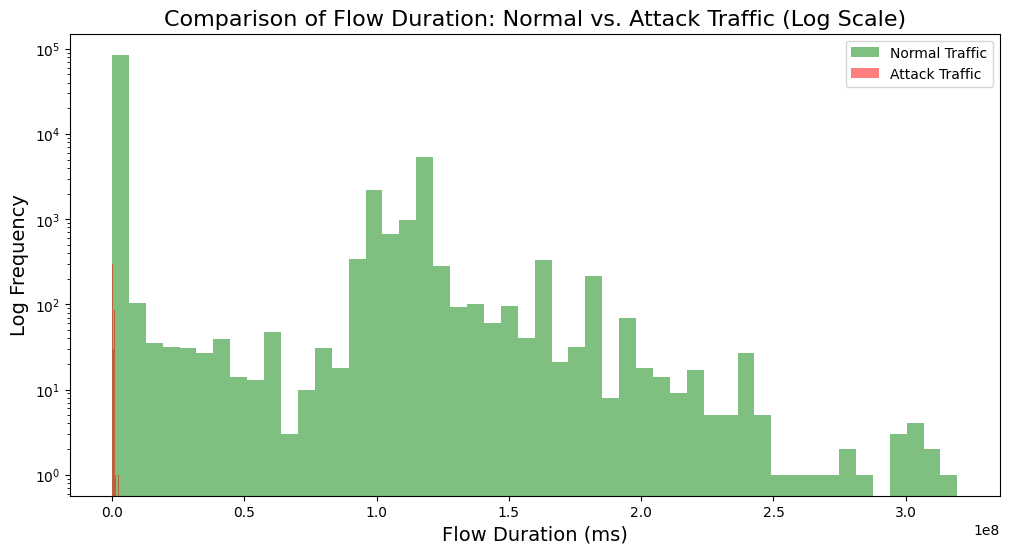

In [ ]:
plt.figure(figsize=(12, 6))

# Normal traffic distribution
plt.hist(normal_traffic['flow_duration'], bins=50, alpha=0.5, label='Normal Traffic', color='green')

# Attack traffic distribution
plt.hist(attack_traffic['flow_duration'], bins=50, alpha=0.5, label='Attack Traffic', color='red')

# Label the axes
plt.xlabel('Flow Duration (ms)', fontsize=14)
plt.ylabel('Log Frequency', fontsize=14)

# Use a log scale for the y-axis
plt.yscale('log')

# Add a title and legend
plt.title('Comparison of Flow Duration: Normal vs. Attack Traffic (Log Scale)', fontsize=16)
plt.legend()

# Show the plot
plt.show()

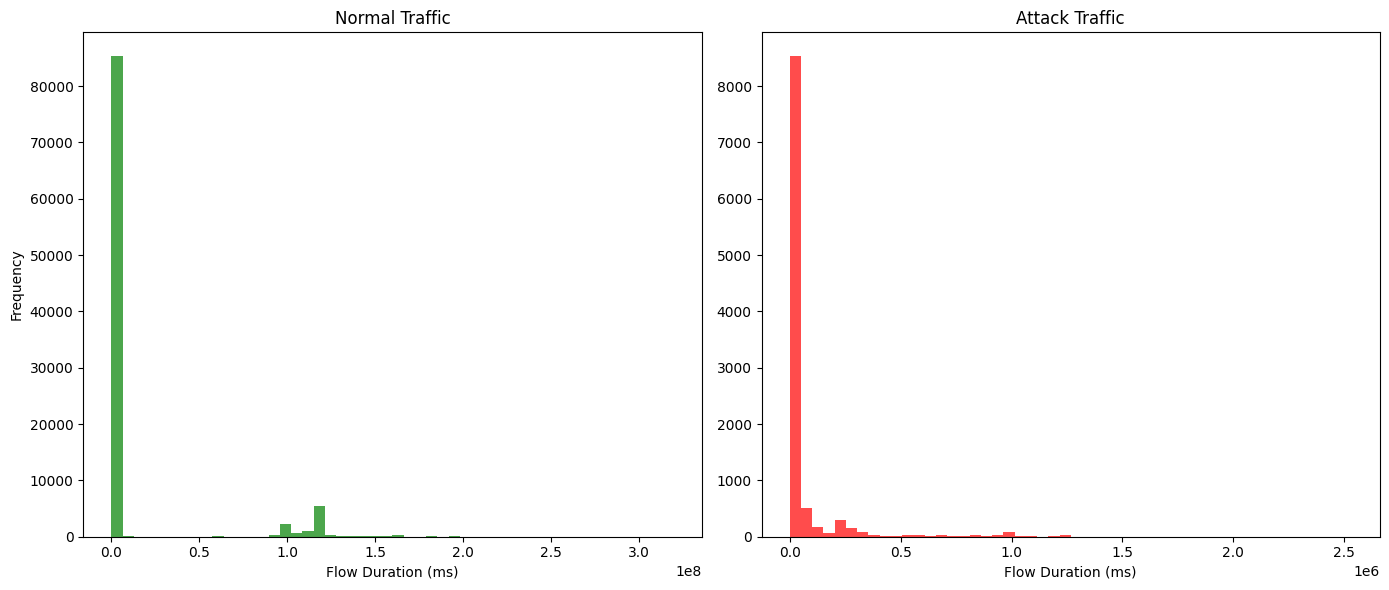

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Normal traffic distribution
ax[0].hist(normal_traffic['flow_duration'], bins=50, alpha=0.7, color='green')
ax[0].set_title('Normal Traffic')
ax[0].set_xlabel('Flow Duration (ms)')
ax[0].set_ylabel('Frequency')

# Attack traffic distribution
ax[1].hist(attack_traffic['flow_duration'], bins=50, alpha=0.7, color='red')
ax[1].set_title('Attack Traffic')
ax[1].set_xlabel('Flow Duration (ms)')

plt.tight_layout()
plt.show()

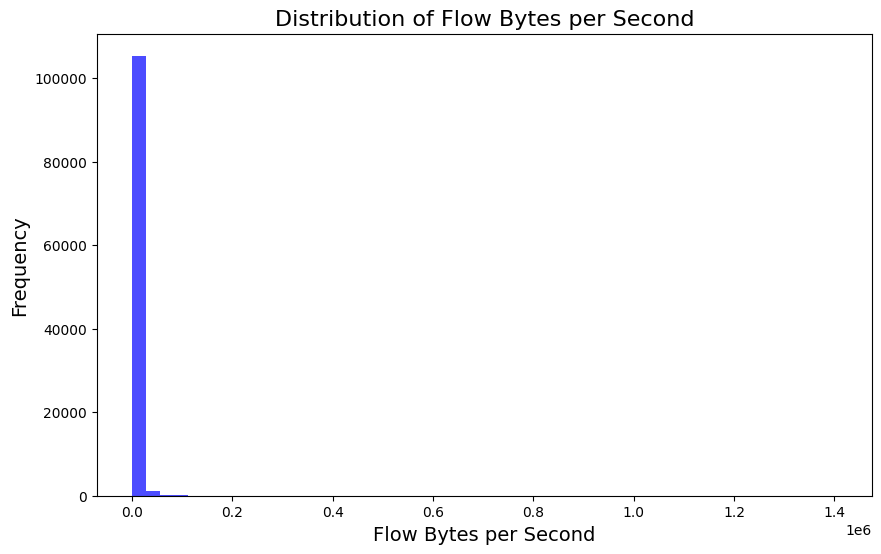

In [ ]:
# Histogram for flow_byts_s
import matplotlib.pyplot as plt

# Plotting histogram for 'flow_byts_s'
plt.figure(figsize=(10, 6))

# Plot the histogram with 50 bins (you can adjust the bin size as needed)
plt.hist(data['flow_byts_s'], bins=50, color='blue', alpha=0.7)

# Labeling the axes
plt.xlabel('Flow Bytes per Second', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add a title
plt.title('Distribution of Flow Bytes per Second', fontsize=16)

# Show the plot
plt.show()

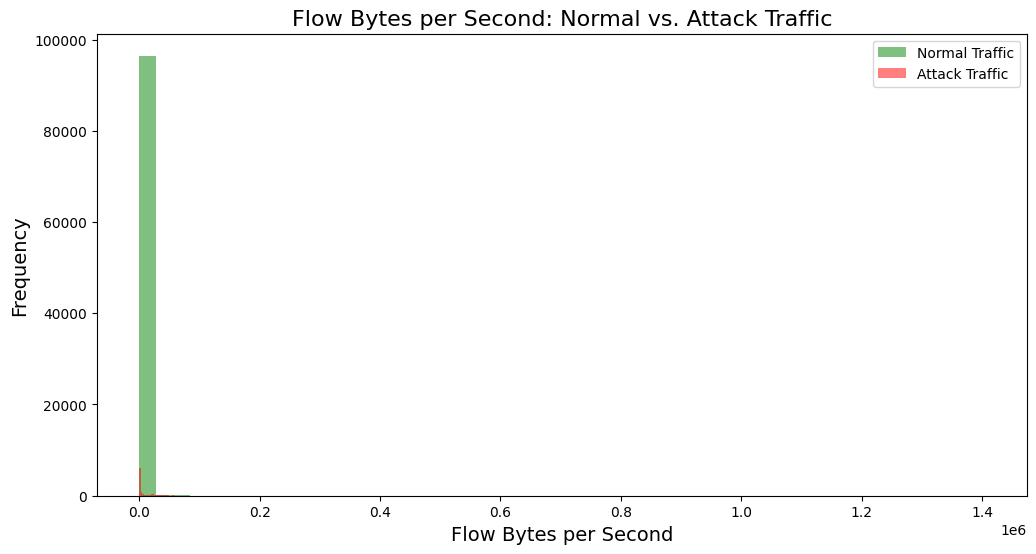

In [ ]:
# Assuming 'Label' indicates normal (0) and attack (1) traffic
normal_traffic = data[data['BinLabel'] == 0]
attack_traffic = data[data['BinLabel'] != 0]

plt.figure(figsize=(12, 6))

# Normal traffic distribution
plt.hist(normal_traffic['flow_byts_s'], bins=50, alpha=0.5, label='Normal Traffic', color='green')

# Attack traffic distribution
plt.hist(attack_traffic['flow_byts_s'], bins=50, alpha=0.5, label='Attack Traffic', color='red')

# Label the axes
plt.xlabel('Flow Bytes per Second', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add a title and legend
plt.title('Flow Bytes per Second: Normal vs. Attack Traffic', fontsize=16)
plt.legend()

# Show the plot
plt.show()

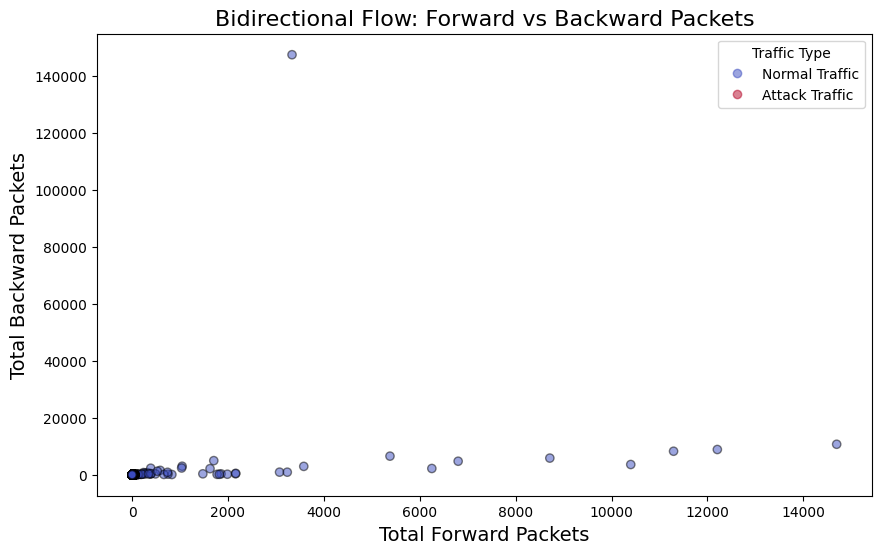

In [ ]:
# Bidirectional Flow Comparison
import matplotlib.pyplot as plt

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Scatter plot with color coding based on traffic label
# Assuming 'Label' column contains 0 for normal traffic and 1 for attack traffic
# Adjust the color and alpha as needed
scatter = plt.scatter(
    data['tot_fwd_pkts'],
    data['tot_bwd_pkts'],
    c=data['BinLabel'],  # Using 'Label' to color points
    cmap='coolwarm',   # Colormap
    alpha=0.5,         # Transparency of points
    edgecolor='k'      # Edge color for better visibility
)

# Labeling the axes
plt.xlabel('Total Forward Packets', fontsize=14)
plt.ylabel('Total Backward Packets', fontsize=14)

# Title
plt.title('Bidirectional Flow: Forward vs Backward Packets', fontsize=16)

# Create a legend
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Normal Traffic', 'Attack Traffic'], title="Traffic Type")

# Show plot
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

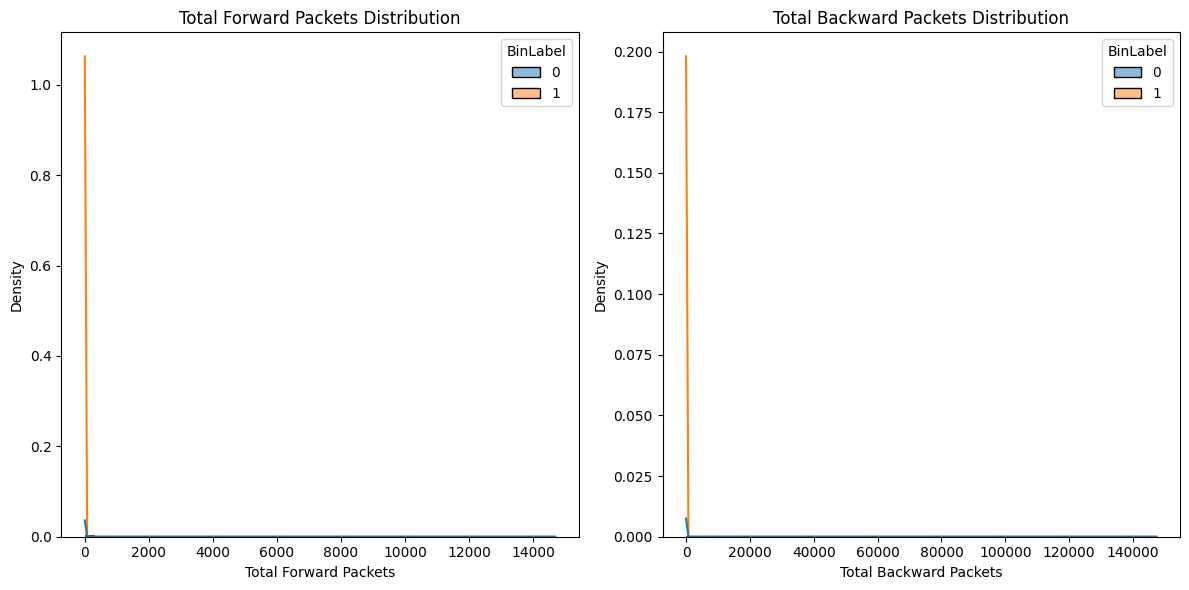

In [ ]:
import seaborn as sns

# Create a combined plot for both forward and backward packets
plt.figure(figsize=(12, 6))

# Total Forward Packets Distribution
plt.subplot(1, 2, 1)
sns.histplot(data, x='tot_fwd_pkts', hue='BinLabel', bins=50, kde=True, stat='density')
plt.title('Total Forward Packets Distribution')
plt.xlabel('Total Forward Packets')
plt.ylabel('Density')

# Total Backward Packets Distribution
plt.subplot(1, 2, 2)
sns.histplot(data, x='tot_bwd_pkts', hue='BinLabel', bins=50, kde=True, stat='density')
plt.title('Total Backward Packets Distribution')
plt.xlabel('Total Backward Packets')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Attack Number'] = le.fit_transform(data['Label'])

print(data['Attack Number'].unique())

[0 4 2 3 1]


In [ ]:
encoded_values = data['Attack Number'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")

0: Benign
1: HTTPAttack
2: TCPAttack
3: UDPAttack
4: XMasAttack


In [ ]:
corr = data.corr(numeric_only = True).round(2)
corr.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

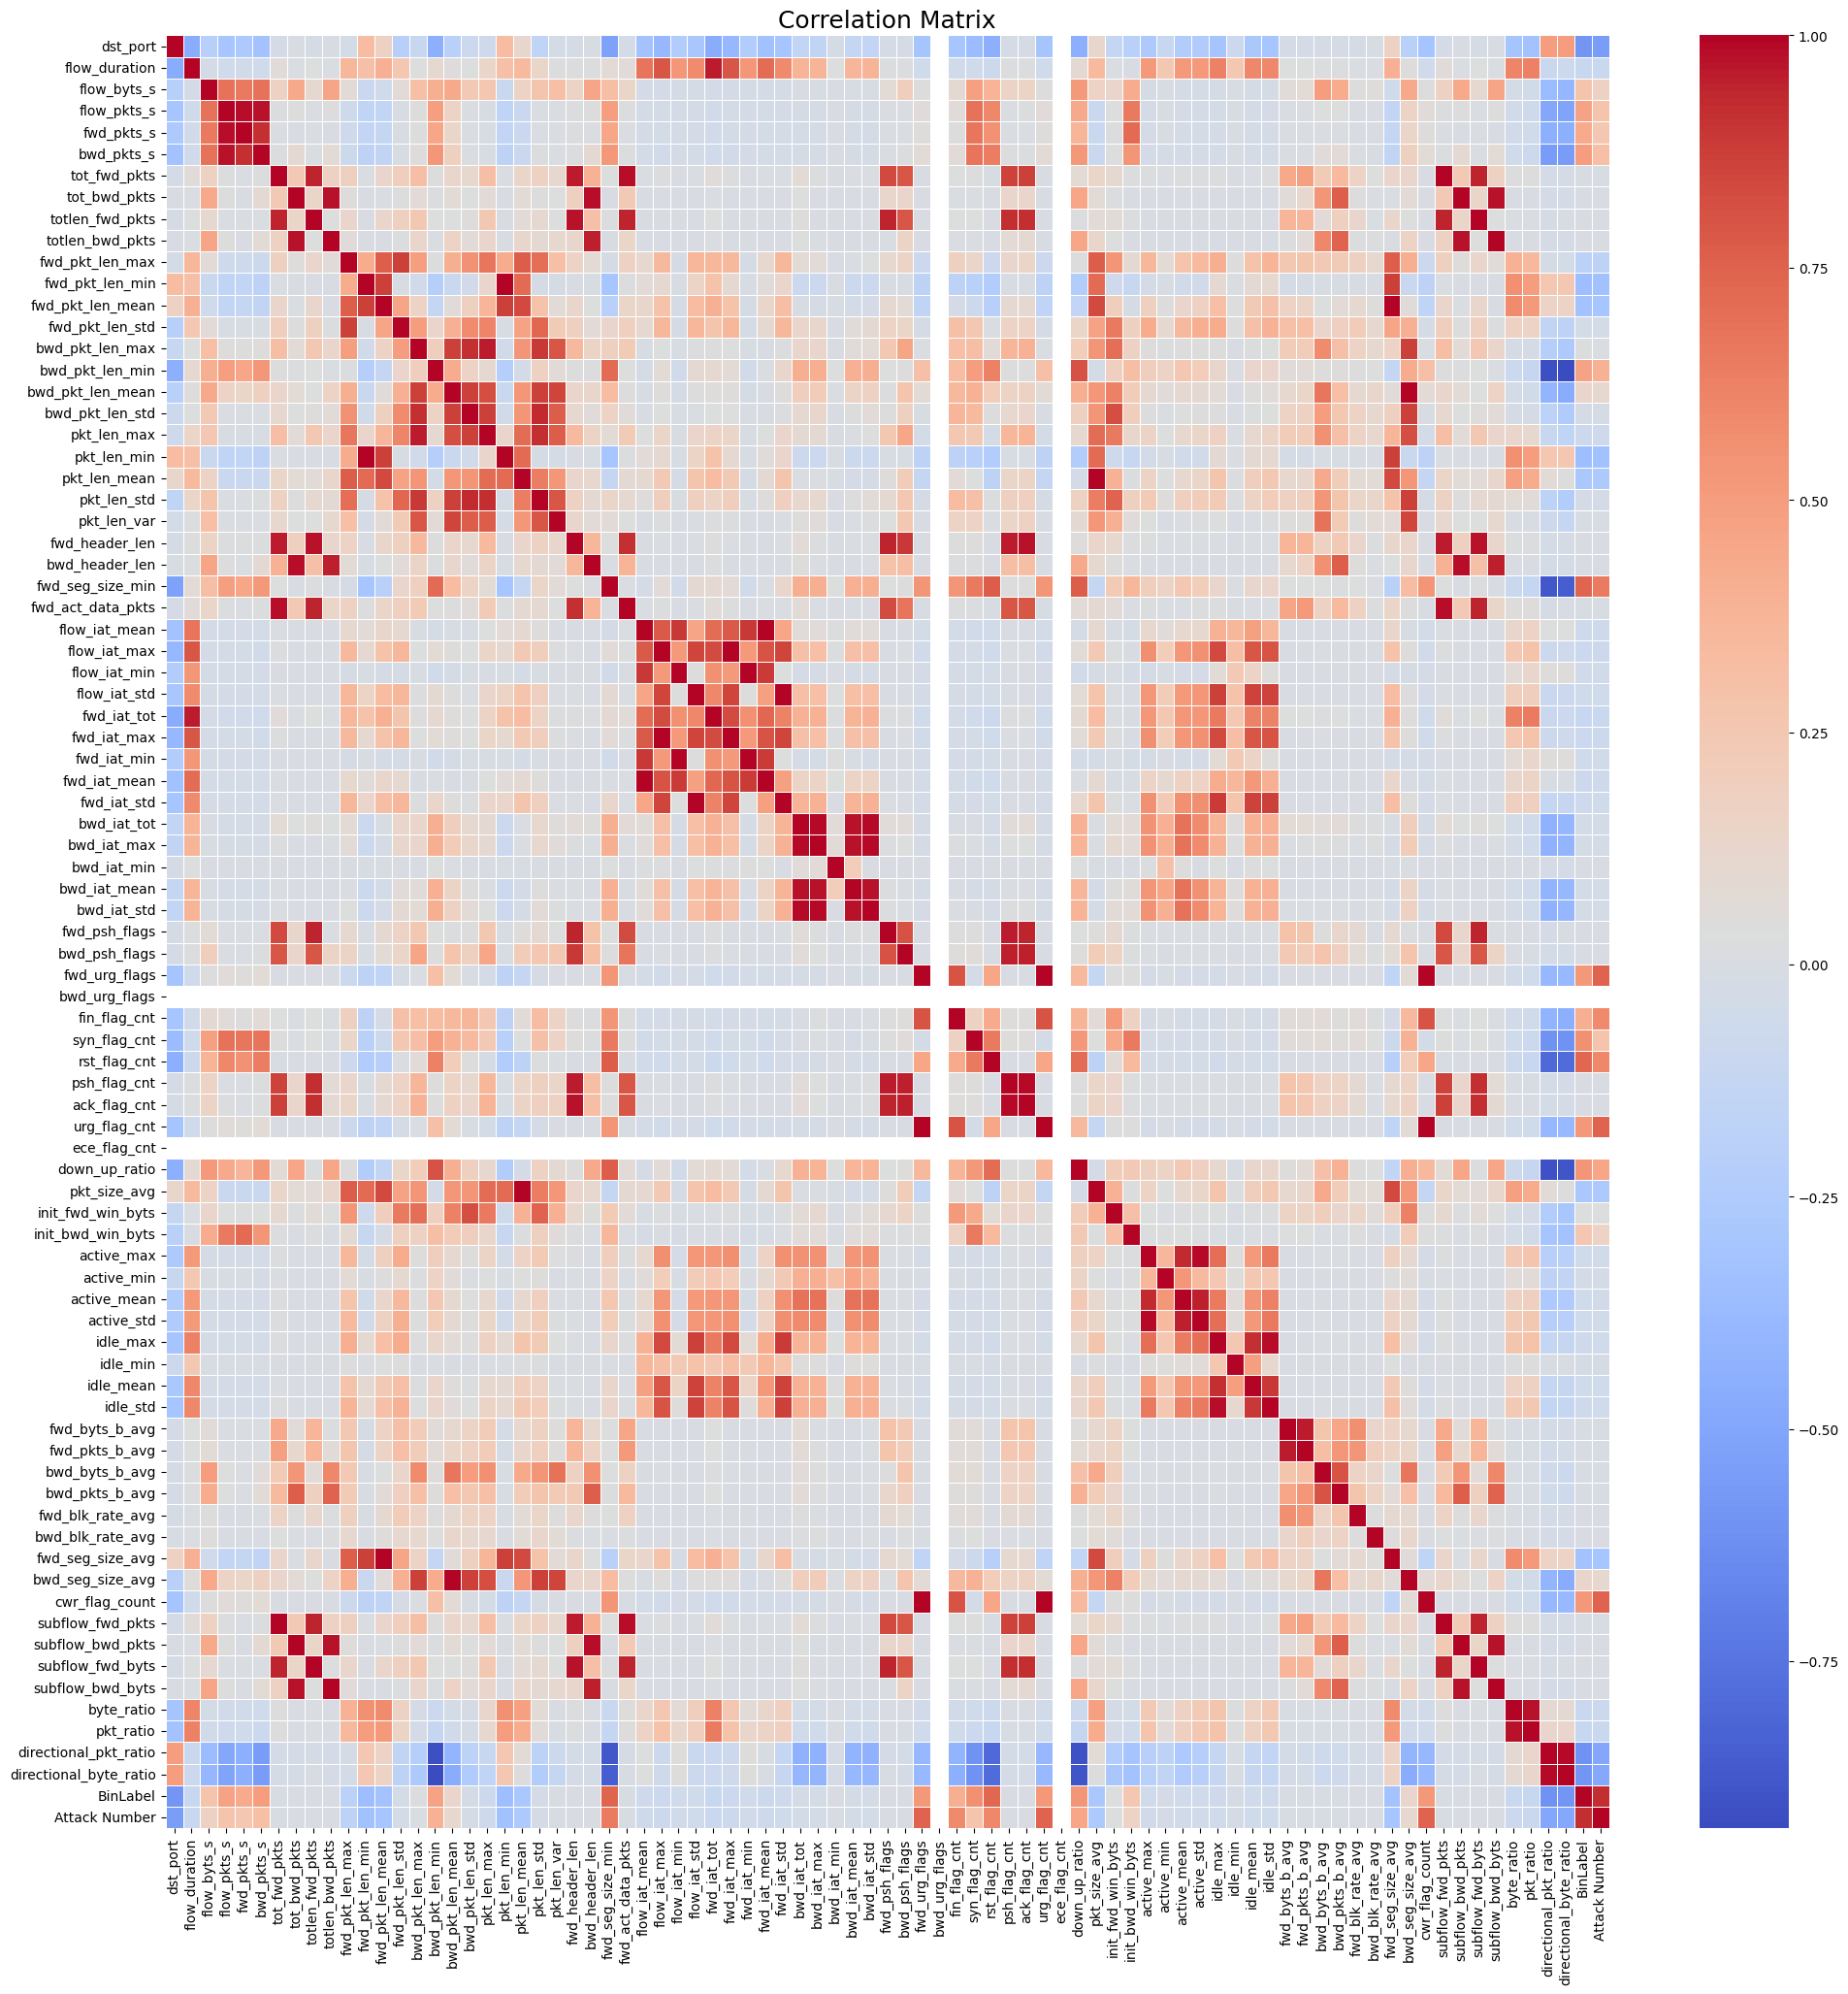

In [ ]:
fig, ax = plt.subplots(figsize = (24, 24))
sns.heatmap(corr, cmap = 'coolwarm', annot = False, linewidth = 0.5)
plt.title('Correlation Matrix', fontsize = 18)
plt.show()

In [ ]:
# Positive correlation features for Label
pos_corr_features = corr['Attack Number'][(corr['Attack Number'] > 0) & (corr['Attack Number'] < 1)].index.tolist()

print("Features with positive correlation with Label:\n")
for i, feature in enumerate(pos_corr_features, start = 1):
    corr_value = corr.loc[feature, 'Attack Number']
    print('{:<3} {:<24} :{}'.format(f'{i}.', feature, corr_value))

Features with positive correlation with Label:

1.  flow_byts_s              :0.17
2.  flow_pkts_s              :0.28
3.  fwd_pkts_s               :0.26
4.  bwd_pkts_s               :0.31
5.  bwd_pkt_len_max          :0.01
6.  bwd_pkt_len_min          :0.39
7.  bwd_pkt_len_mean         :0.11
8.  fwd_seg_size_min         :0.65
9.  fwd_urg_flags            :0.75
10. fin_flag_cnt             :0.59
11. syn_flag_cnt             :0.28
12. rst_flag_cnt             :0.6
13. urg_flag_cnt             :0.75
14. down_up_ratio            :0.45
15. init_fwd_win_byts        :0.03
16. init_bwd_win_byts        :0.16
17. bwd_seg_size_avg         :0.11
18. cwr_flag_count           :0.75
19. BinLabel                 :0.92


In [ ]:
print(f'No of important features: {len(pos_corr_features)}')

No of important features: 19


In [ ]:
# Checking for columns with zero standard deviation (the blank squares in the heatmap)
std = data.std(numeric_only = True)
zero_std_cols = std[std == 0].index.tolist()
zero_std_cols

['bwd_urg_flags', 'ece_flag_cnt']

In [ ]:
sample_size = len(data)
sampled_data = data.sample(n = sample_size, replace = False, random_state = 0)
sampled_data.shape

(106972, 84)

In [ ]:
# Printing the unique value count
indent = '{:<3} {:<30}: {}'
print('Unique value count for: ')
for i, feature in enumerate(list(sampled_data.columns)[:-1], start = 1):
    print(indent.format(f'{i}.', feature, sampled_data[feature].nunique()))

Unique value count for: 
1.  dst_port                      : 172
2.  flow_duration                 : 16398
3.  flow_byts_s                   : 17552
4.  flow_pkts_s                   : 16425
5.  fwd_pkts_s                    : 16428
6.  bwd_pkts_s                    : 7936
7.  tot_fwd_pkts                  : 112
8.  tot_bwd_pkts                  : 99
9.  totlen_fwd_pkts               : 1425
10. totlen_bwd_pkts               : 373
11. fwd_pkt_len_max               : 133
12. fwd_pkt_len_min               : 81
13. fwd_pkt_len_mean              : 1291
14. fwd_pkt_len_std               : 1333
15. bwd_pkt_len_max               : 169
16. bwd_pkt_len_min               : 70
17. bwd_pkt_len_mean              : 368
18. bwd_pkt_len_std               : 332
19. pkt_len_max                   : 233
20. pkt_len_min                   : 81
21. pkt_len_mean                  : 1418
22. pkt_len_std                   : 1502
23. pkt_len_var                   : 1502
24. fwd_header_len                : 147
25. 

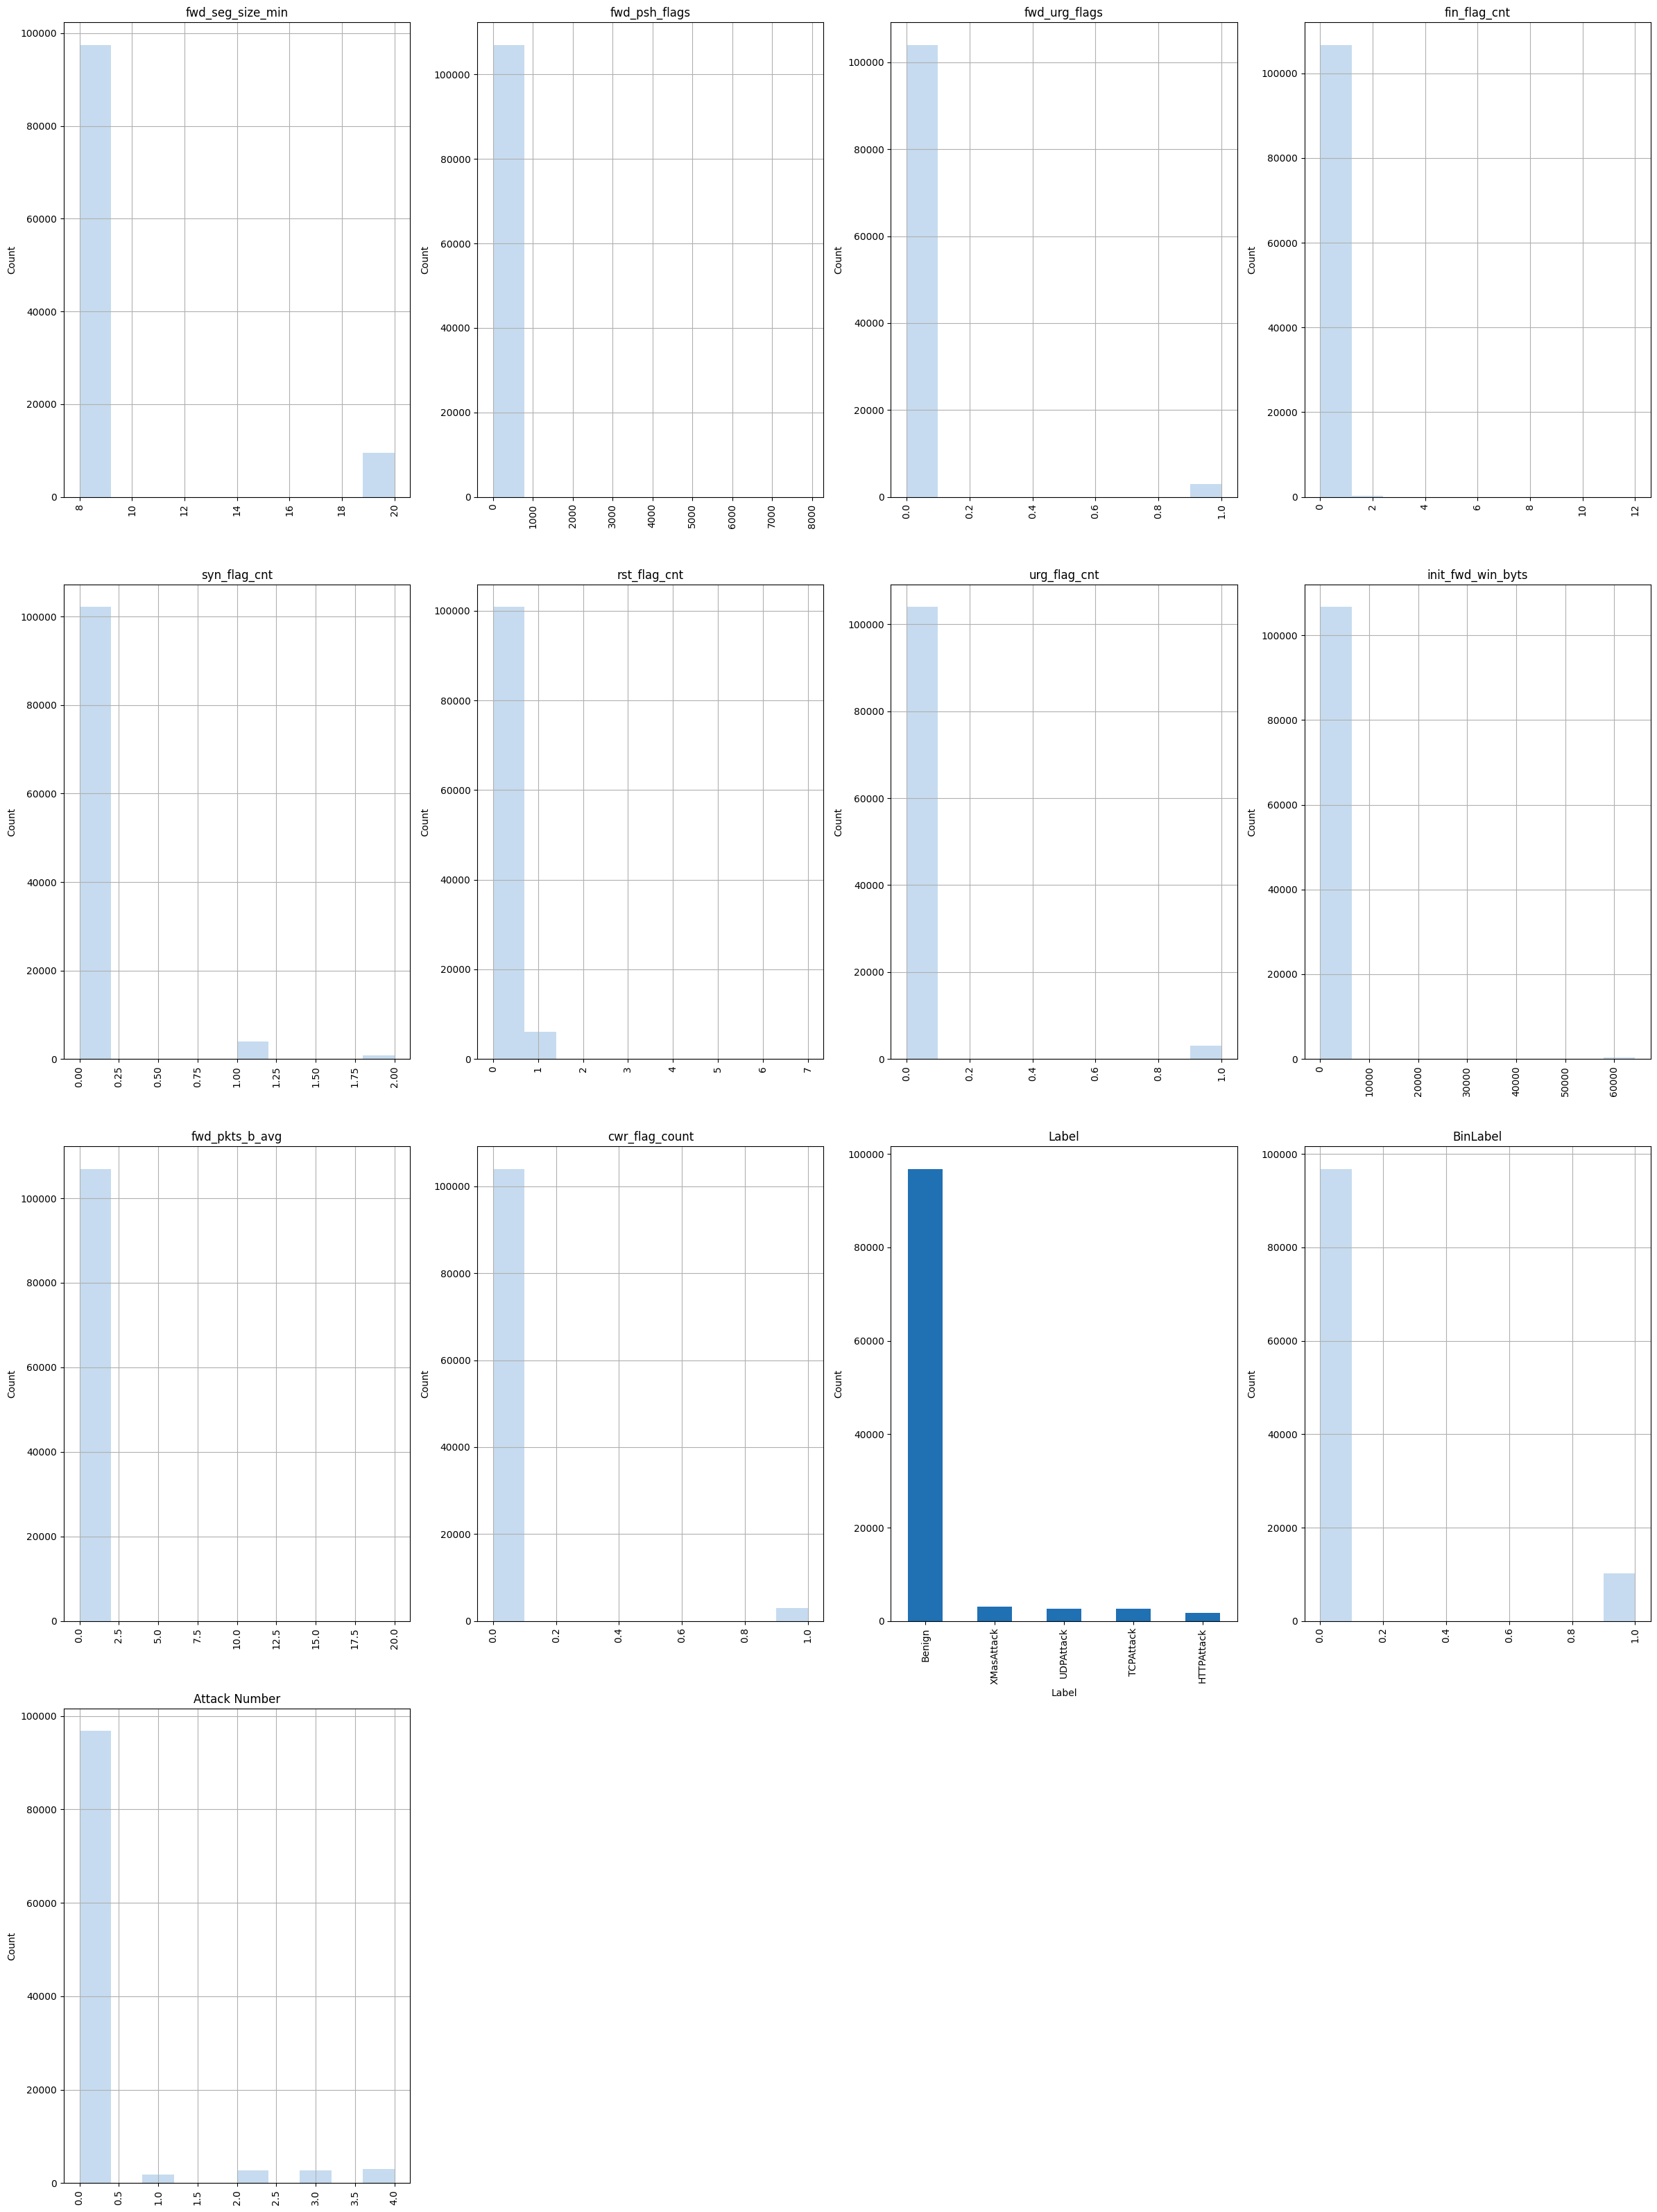

In [ ]:
unique_values = sampled_data.nunique()
selected_cols = sampled_data[[col for col in sampled_data if 1 < unique_values[col] < 50]]
rows, cols = selected_cols.shape
col_names = list(selected_cols)
num_of_rows = (cols + 3) // 4

color_palette = sns.color_palette('Blues', n_colors = 3)
plt.figure(figsize = (6 * 4, 8 * num_of_rows))

for i in range(cols):
    plt.subplot(num_of_rows, 4, i + 1)
    col_data = selected_cols.iloc[:, i]
    if col_data.dtype.name == 'object':
        col_data.value_counts().plot(kind = 'bar', color = color_palette[2])
    else:
        col_data.hist(color = color_palette[0])

    plt.ylabel('Count')
    plt.xticks(rotation = 90)
    plt.title(col_names[i])

plt.tight_layout()
plt.show()

In [ ]:
corr_matrix = sampled_data.corr(numeric_only = True).round(2)
corr_matrix.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

In [ ]:
drop_columns = [
    "BinLabel"
   ]
sampled_data.drop(columns=drop_columns, inplace=True, errors='ignore')

In [ ]:
cols = sampled_data.select_dtypes(include=[np.number]).columns
high_corr_pairs = []
corr_th = 0.85

# Compute correlations for numeric columns only
for i in range(len(cols)):
  for j in range(i + 1, len(cols)):
    val = sampled_data[cols[i]].corr(sampled_data[cols[j]])
    # If the correlation coefficient is NaN or below the threshold, skip to the next pair
    if np.isnan(val) or val < corr_th:
      continue
    high_corr_pairs.append((val, cols[i], cols[j]))

# Set up plot dimensions based on the number of correlation pairs
size, cols = len(high_corr_pairs), 4
rows, rem =  size // cols, size % cols
if rem:
  rows += 1

fig, axs = plt.subplots(rows, cols, figsize = (24, int(size * 1.7)))
for i in range(rows):
    for j in range(cols):
      try:
        val, x, y = high_corr_pairs[i * cols + j]
        if val > 0.99:
          axs[i, j].scatter(sampled_data[x], sampled_data[y], color = 'green', alpha = 0.1)
        else:
          axs[i, j].scatter(sampled_data[x], sampled_data[y], color = 'blue', alpha = 0.1)
        axs[i, j].set_xlabel(x)
        axs[i, j].set_ylabel(y)
        axs[i, j].set_title(f'{x} vs\n{y} ({val:.2f})')
      except IndexError:
        fig.delaxes(axs[i, j])

fig.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
sampled_data.drop('Attack Number', axis = 1, inplace = True)
data.drop('Attack Number', axis = 1, inplace = True)

In [ ]:
# Identifying outliers
numeric_data = sampled_data.select_dtypes(include = ['float', 'int'])
q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)
iqr = q3 - q1
outlier = (numeric_data < (q1 - 1.5 * iqr)) | (numeric_data > (q3 + 1.5 * iqr))
outlier_count = outlier.sum()
outlier_percentage = round(outlier.mean() * 100, 2)
outlier_stats = pd.concat([outlier_count, outlier_percentage], axis = 1)
outlier_stats.columns = ['Outlier Count', 'Outlier Percentage']

print(outlier_stats)

                        Outlier Count  Outlier Percentage
dst_port                            0                0.00
flow_duration                   18539               17.33
flow_byts_s                     18539               17.33
flow_pkts_s                     18539               17.33
fwd_pkts_s                      18539               17.33
...                               ...                 ...
subflow_bwd_byts                 8711                8.14
byte_ratio                       9552                8.93
pkt_ratio                       18539               17.33
directional_pkt_ratio           18539               17.33
directional_byte_ratio           8711                8.14

[81 rows x 2 columns]


In [ ]:
# Identifying outliers based on attack type
outlier_counts = {}
for i in numeric_data:
    for label in sampled_data['Label'].unique():
        attack_data = sampled_data[i][sampled_data['Label'] == label]
        q1, q3 = np.percentile(attack_data, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        num_outliers = ((attack_data < lower_bound) | (attack_data > upper_bound)).sum()
        outlier_percent = num_outliers / len(attack_data) * 100
        outlier_counts[(i, label)] = (num_outliers, outlier_percent)

for i in numeric_data:
  print(f'Feature: {i}')
  for label in sampled_data['Label'].unique():
    num_outliers, outlier_percent = outlier_counts[(i, label)]
    print(f'- {label}: {num_outliers} ({outlier_percent:.2f}%)')
  print()

Feature: dst_port
- TCPAttack: 0 (0.00%)
- Benign: 0 (0.00%)
- XMasAttack: 0 (0.00%)
- UDPAttack: 0 (0.00%)
- HTTPAttack: 0 (0.00%)

Feature: flow_duration
- TCPAttack: 519 (19.22%)
- Benign: 12440 (12.86%)
- XMasAttack: 284 (9.44%)
- UDPAttack: 1 (0.04%)
- HTTPAttack: 365 (20.28%)

Feature: flow_byts_s
- TCPAttack: 137 (5.07%)
- Benign: 12440 (12.86%)
- XMasAttack: 179 (5.95%)
- UDPAttack: 1 (0.04%)
- HTTPAttack: 36 (2.00%)

Feature: flow_pkts_s
- TCPAttack: 131 (4.85%)
- Benign: 12440 (12.86%)
- XMasAttack: 156 (5.19%)
- UDPAttack: 1 (0.04%)
- HTTPAttack: 33 (1.83%)

Feature: fwd_pkts_s
- TCPAttack: 172 (6.37%)
- Benign: 12440 (12.86%)
- XMasAttack: 156 (5.19%)
- UDPAttack: 1 (0.04%)
- HTTPAttack: 52 (2.89%)

Feature: bwd_pkts_s
- TCPAttack: 1 (0.04%)
- Benign: 2612 (2.70%)
- XMasAttack: 156 (5.19%)
- UDPAttack: 1 (0.04%)
- HTTPAttack: 0 (0.00%)

Feature: tot_fwd_pkts
- TCPAttack: 300 (11.11%)
- Benign: 12094 (12.50%)
- XMasAttack: 0 (0.00%)
- UDPAttack: 0 (0.00%)
- HTTPAttack: 200 (

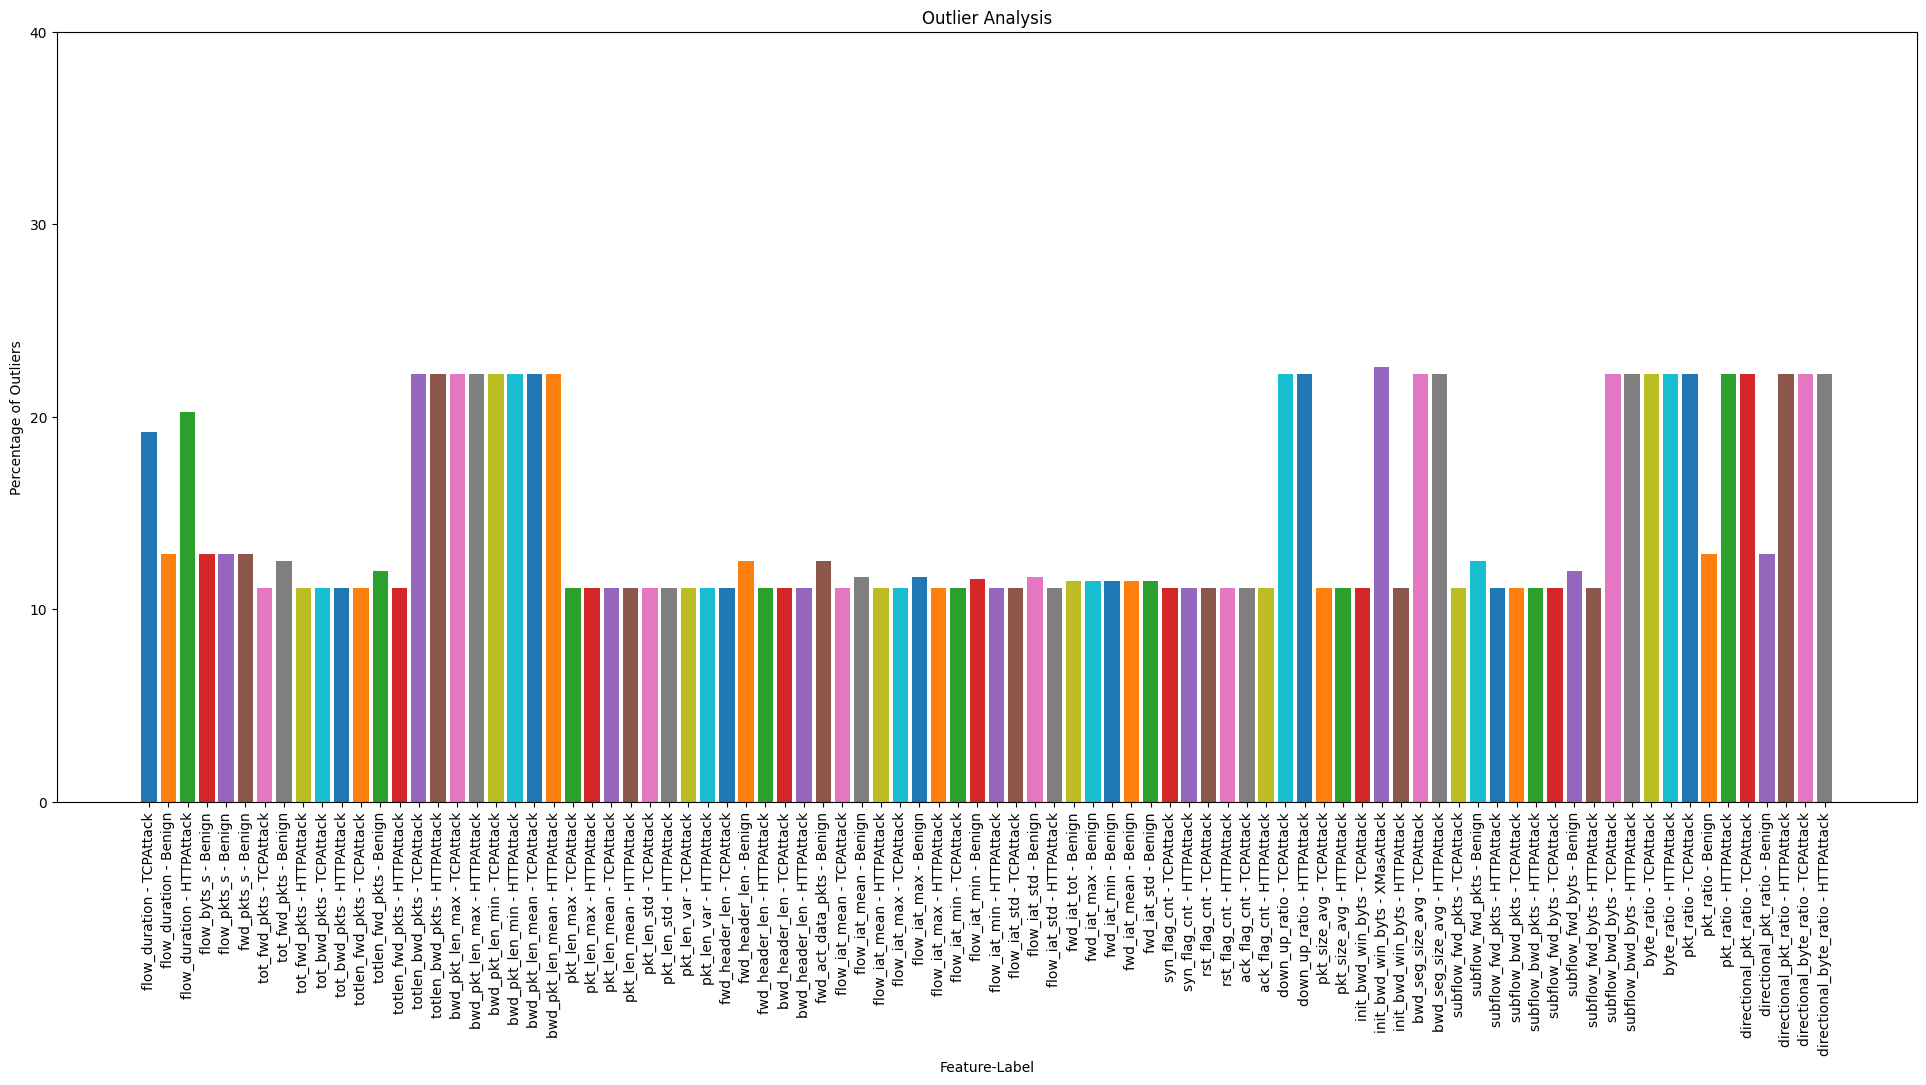

In [ ]:
# Plotting the percentage of outliers that are higher than 20%
fig, ax = plt.subplots(figsize = (24, 10))
for i in numeric_data:
    for label in sampled_data['Label'].unique():
        num_outliers, outlier_percent = outlier_counts[(i, label)]
        if outlier_percent > 10:
            ax.bar(f'{i} - {label}', outlier_percent)

ax.set_xlabel('Feature-Label')
ax.set_ylabel('Percentage of Outliers')
ax.set_title('Outlier Analysis')
ax.set_yticks(np.arange(0, 41, 10))
plt.xticks(rotation = 90)
plt.show()

<ipython-input-49-03f205bd6cf8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Label', data = attacks, palette = 'pastel', order = attacks['Label'].value_counts().index)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base

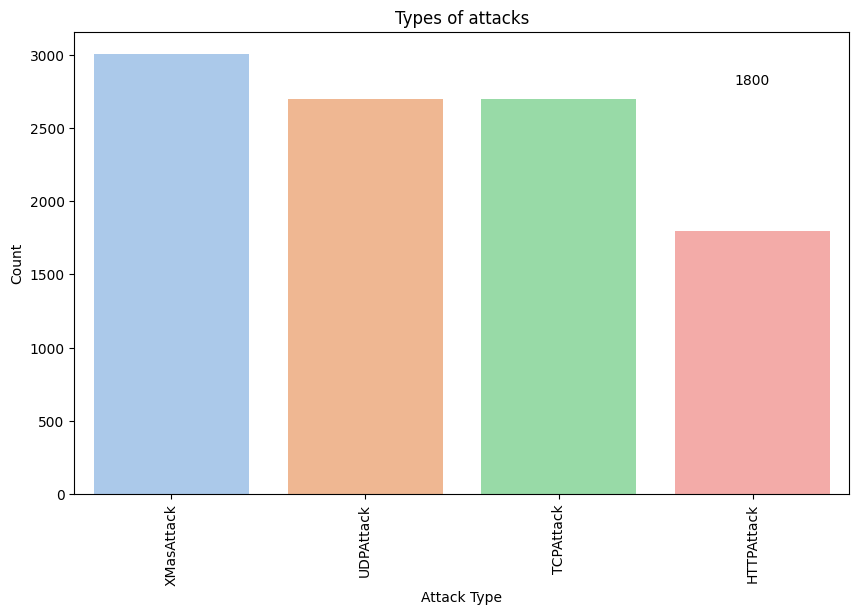

In [ ]:
# # Different Labels
attacks = data.loc[data['Label'] != 'Benign']

plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'Label', data = attacks, palette = 'pastel', order = attacks['Label'].value_counts().index)
plt.title('Types of attacks')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation = 90)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height() + 1000), ha = 'center')

plt.show()

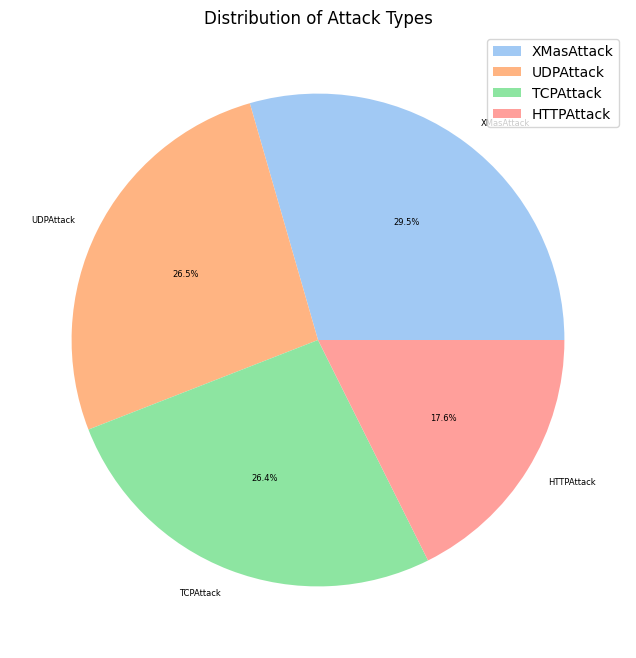

In [ ]:
attack_counts = attacks['Label'].value_counts()
threshold = 0.005
percentages = attack_counts / attack_counts.sum()
small_slices = percentages[percentages < threshold].index.tolist()
attack_counts.drop(small_slices, inplace = True)

sns.set_palette('pastel')
plt.figure(figsize = (8, 8))
plt.pie(attack_counts.values, labels = attack_counts.index, autopct = '%1.1f%%', textprops={'fontsize': 6})
plt.title('Distribution of Attack Types')
plt.legend(attack_counts.index, loc = 'best')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

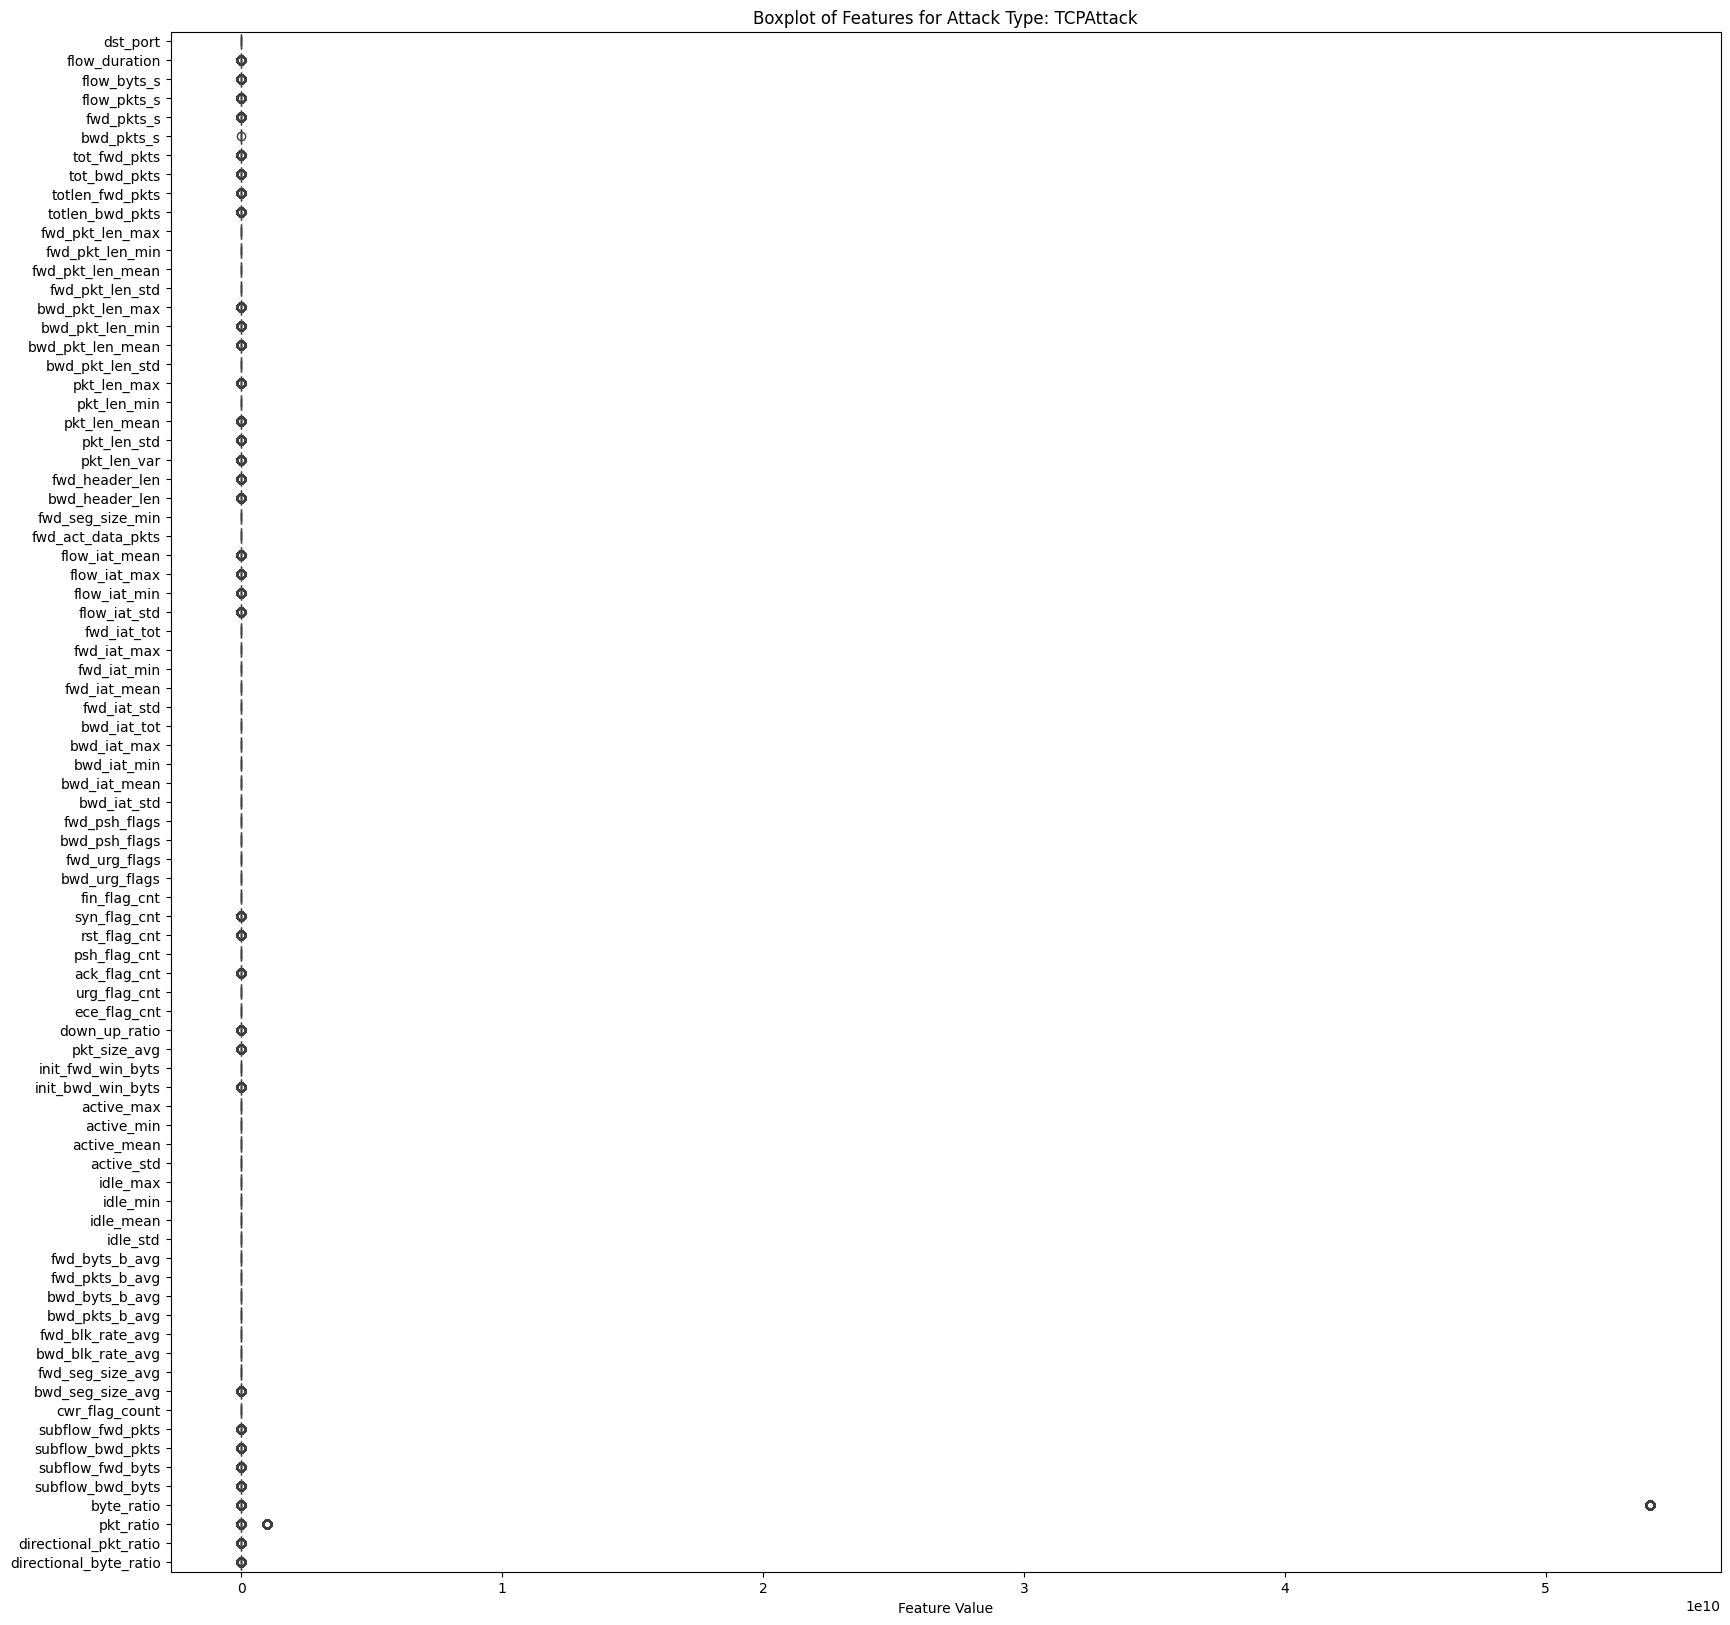

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

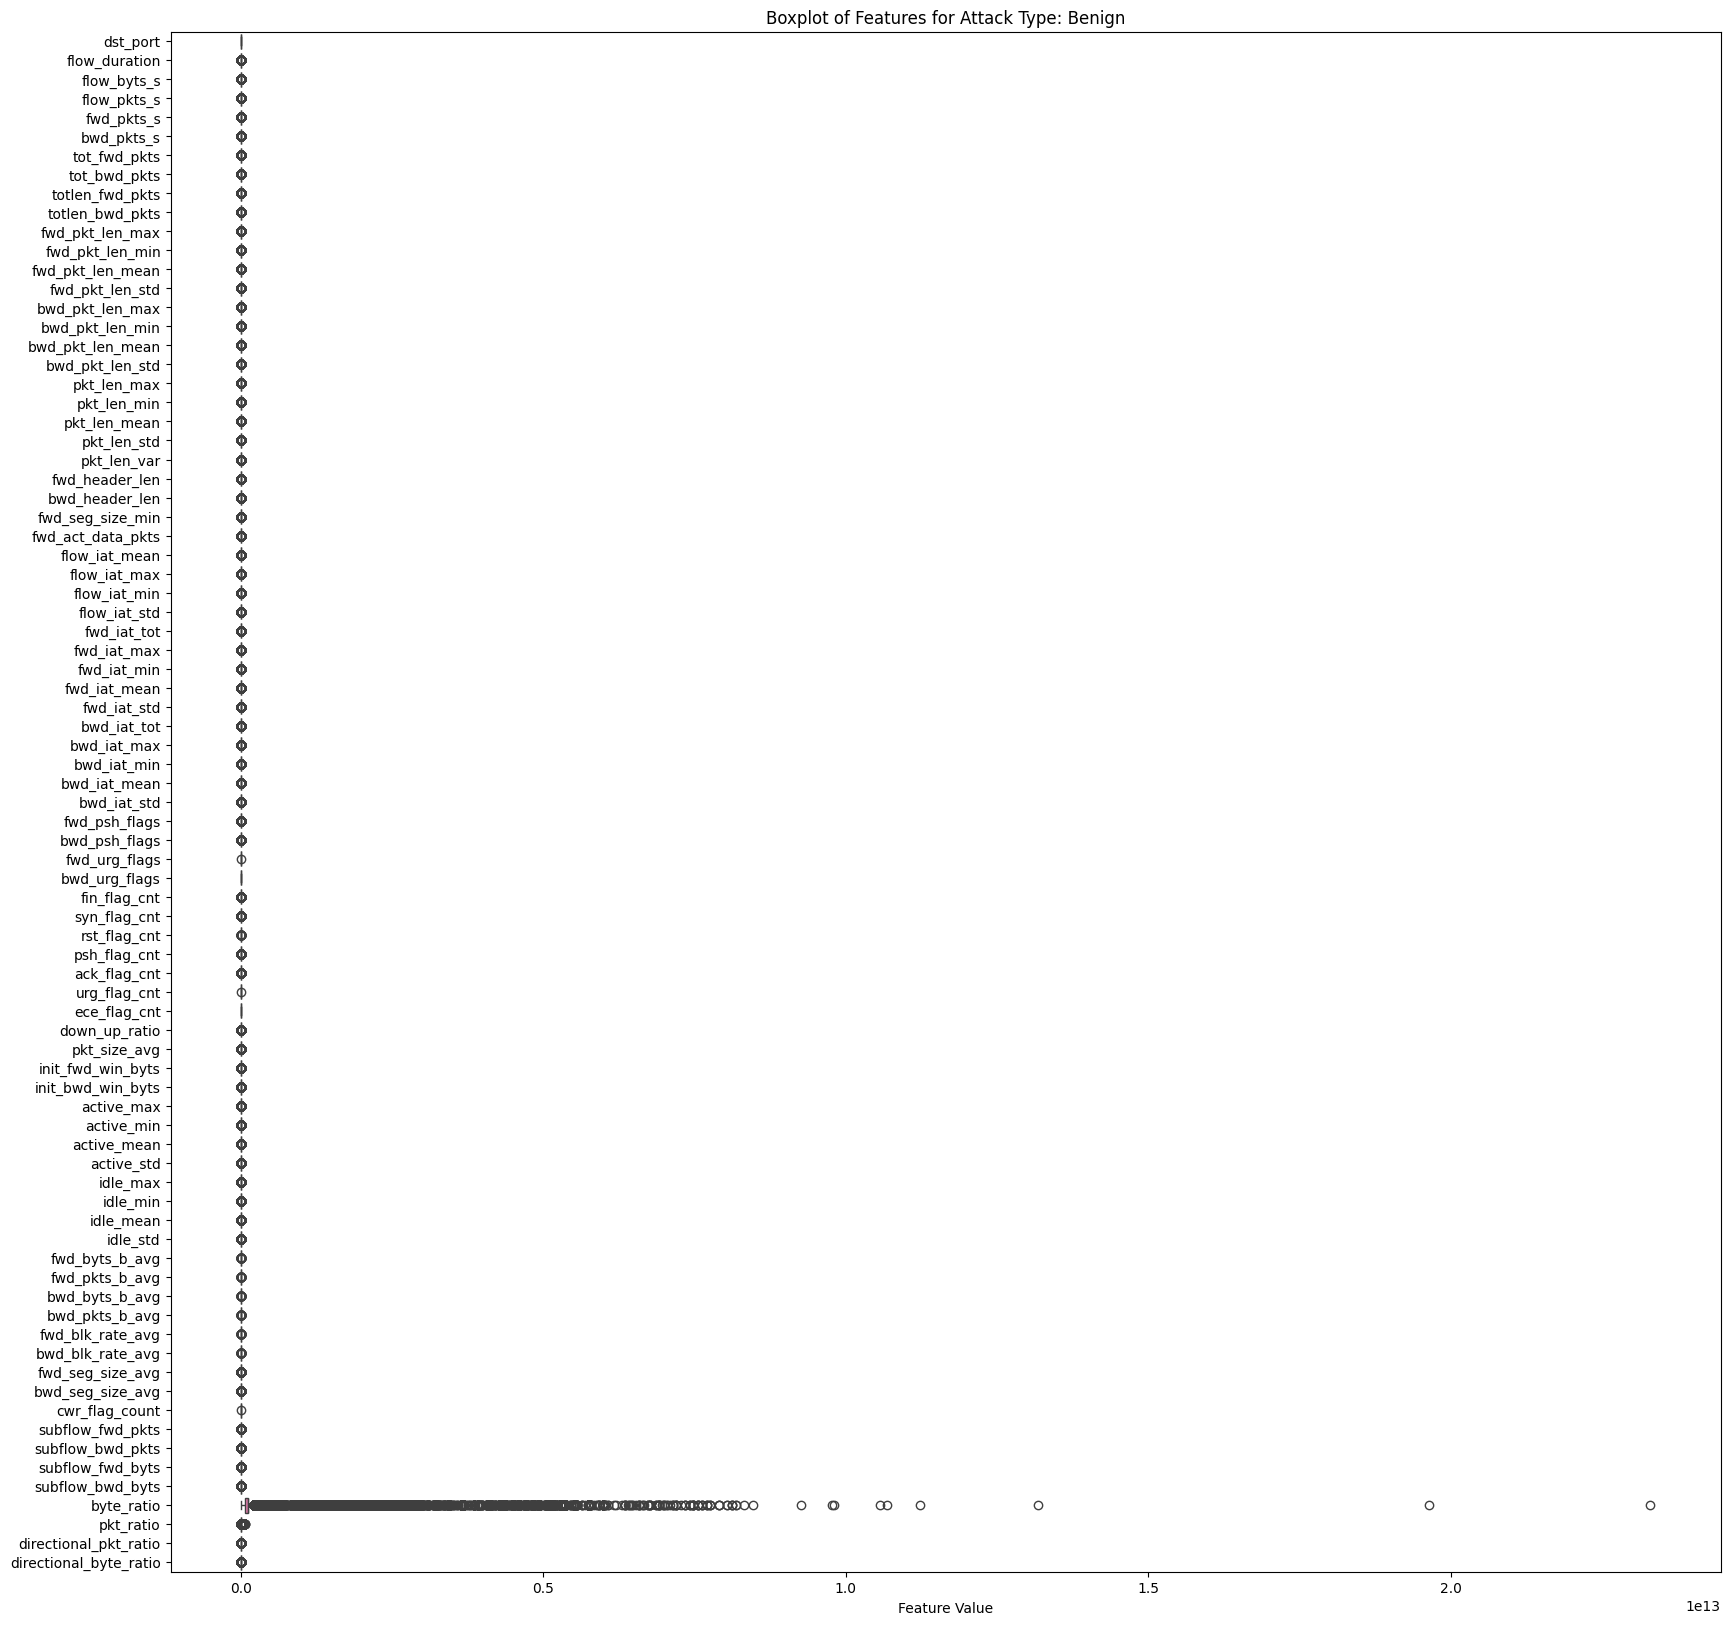

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

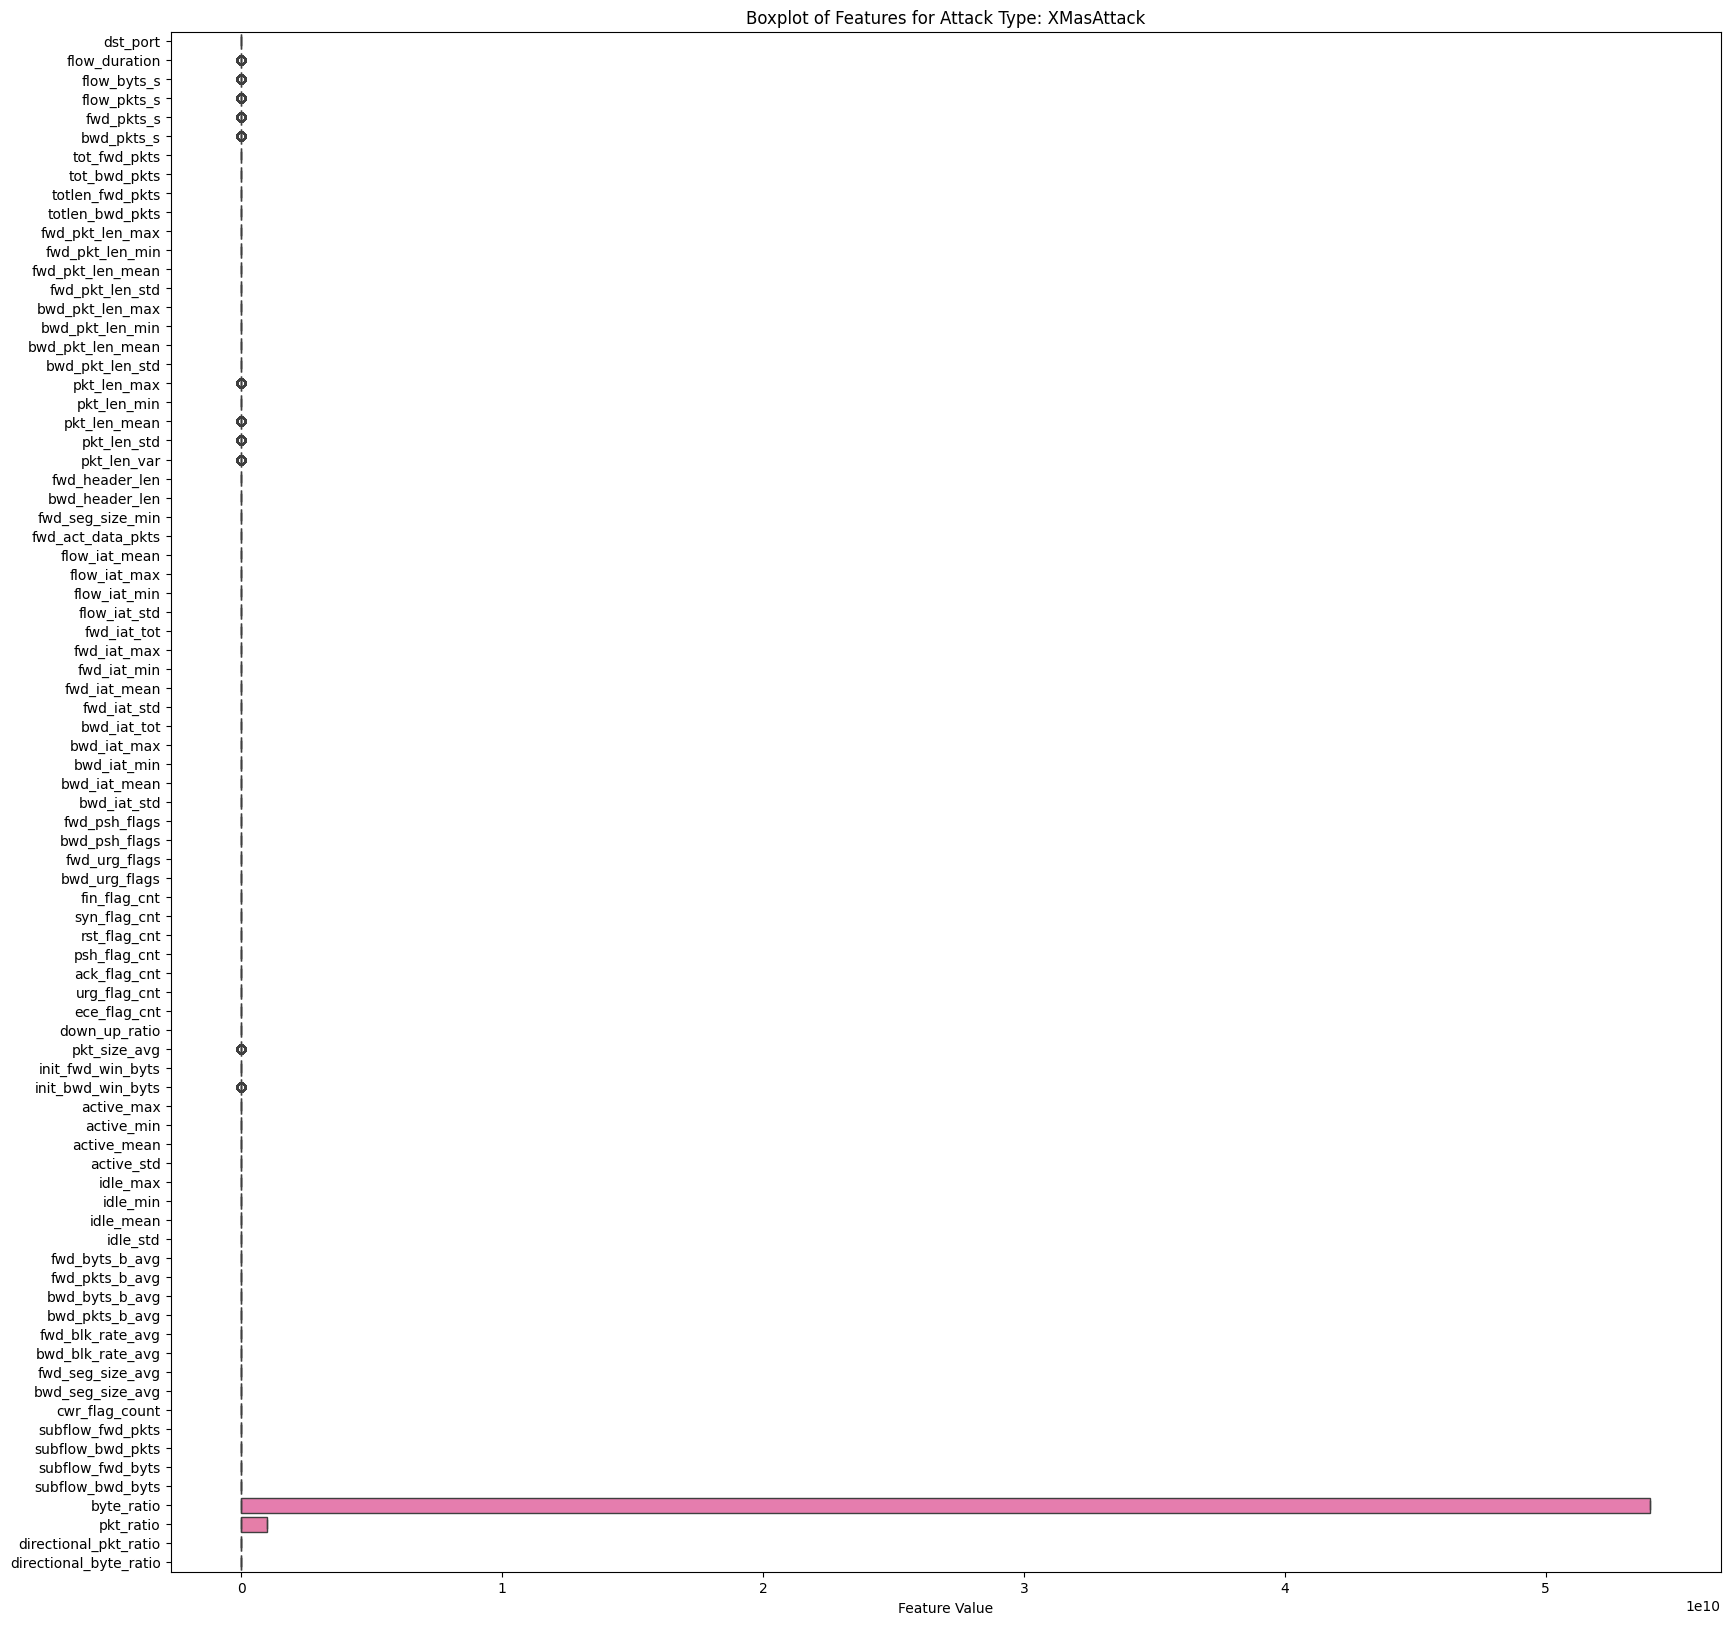

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

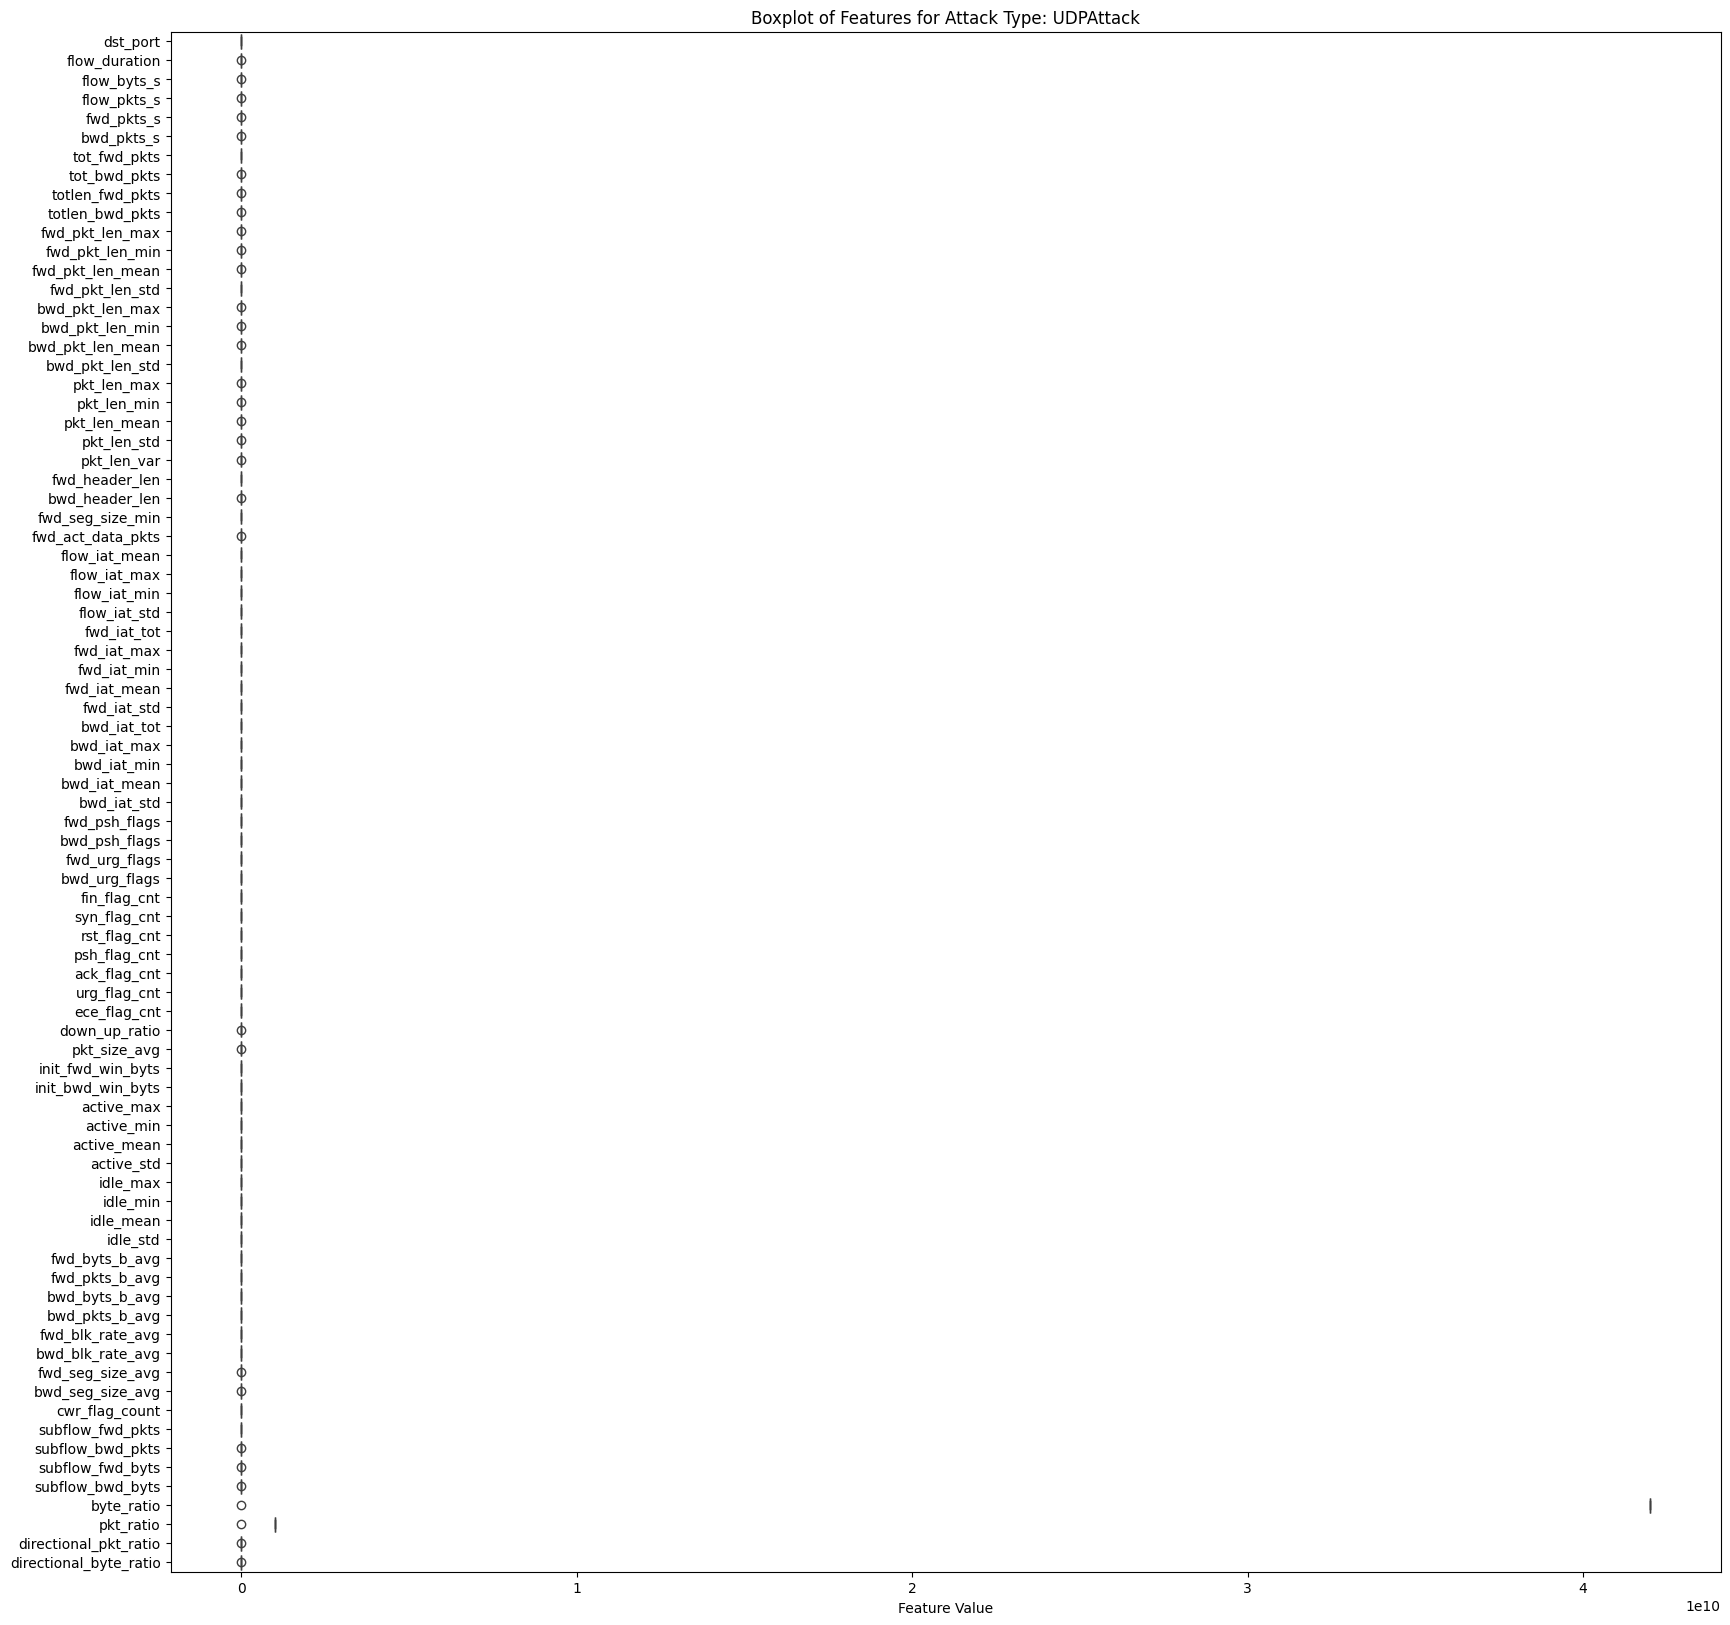

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

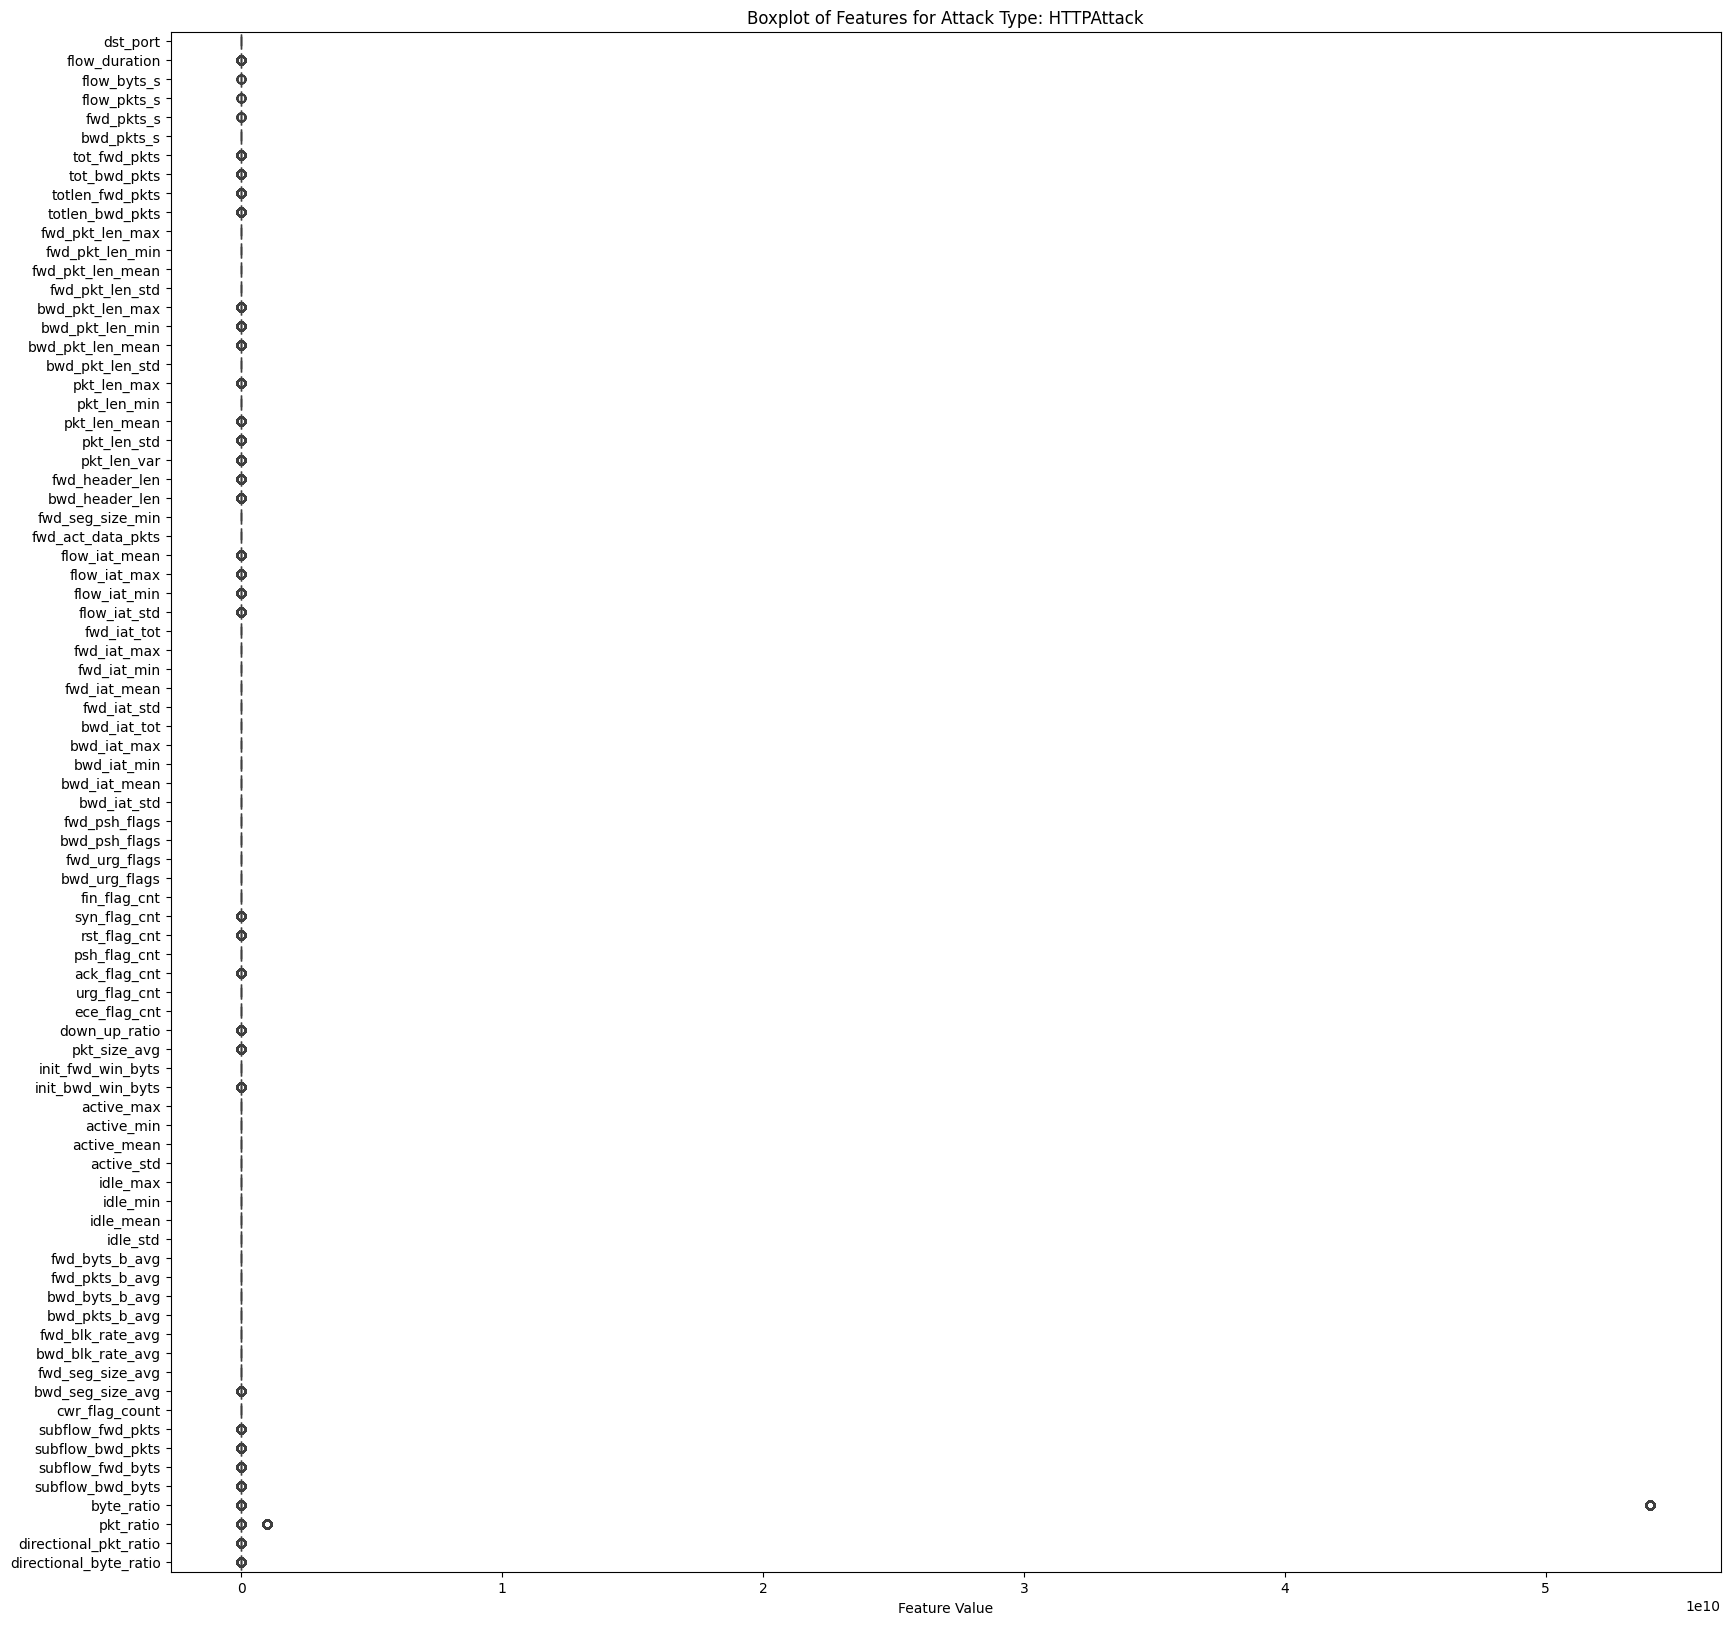

In [ ]:
for attack_type in sampled_data['Label'].unique():
    attack_data = sampled_data[sampled_data['Label'] == attack_type]

    plt.figure(figsize=(20, 20))

    sns.boxplot(data = attack_data.drop(columns = ['Label']), orient = 'h')

    plt.title(f'Boxplot of Features for Attack Type: {attack_type}')
    plt.xlabel('Feature Value')

    plt.show()

In [ ]:
data.groupby('Label').first()

dst_port  flow_duration  flow_byts_s  flow_pkts_s  fwd_pkts_s  \
Label                                                                       
Benign          6667      120013552    42.161905     0.183313    0.183313   
HTTPAttack        80              0     0.000000     0.000000    0.000000   
TCPAttack        443              0     0.000000     0.000000    0.000000   
UDPAttack         53              0     0.000000     0.000000    0.000000   
XMasAttack        25              0     0.000000     0.000000    0.000000   

            bwd_pkts_s  tot_fwd_pkts  tot_bwd_pkts  totlen_fwd_pkts  \
Label                                                                 
Benign             0.0            22             0             5060   
HTTPAttack         0.0             1             0               54   
TCPAttack          0.0             1             0               54   
UDPAttack          0.0             1             0               42   
XMasAttack         0.0             1             0               54   

            totlen_bwd_pkts  ...  cwr_flag_count  subflow_fwd_pkts  \
Label                        ...                                     
Benign                    0  ...               0                22   
HTTPAttack                0  ...               0                 1   
TCPAttack                 0  ...               0                 1   
UDPAttack                 0  ...               0                 1   
XMasAttack                0  ...               1                 1   

            subflow_bwd_pkts  subflow_fwd_byts  subflow_bwd_byts  \
Label                                                              
Benign                     0              5060                 0   
HTTPAttack                 0                54                 0   
TCPAttack                  0                54                 0   
UDPAttack                  0                42                 0   
XMasAttack                 0                54                 0   

              byte_ratio     pkt_ratio  directional_pkt_ratio  \
Label                                                           
Benign      5.060000e+12  2.200000e+10                    1.0   
HTTPAttack  5.400000e+10  1.000000e+09                    1.0   
TCPAttack   5.400000e+10  1.000000e+09                    1.0   
UDPAttack   4.200000e+10  1.000000e+09                    1.0   
XMasAttack  5.400000e+10  1.000000e+09                    1.0   

            directional_byte_ratio  BinLabel  
Label                                         
Benign                         1.0         0  
HTTPAttack                     1.0         1  
TCPAttack                      1.0         1  
UDPAttack                      1.0         1  
XMasAttack                     1.0         1  

[5 rows x 82 columns]

In [ ]:
# Data Preprocessing
# Dropping columns with only one unique value
num_unique = data.nunique()
one_variable = num_unique[num_unique == 1]
not_one_variable = num_unique[num_unique > 1].index

dropped_cols = one_variable.index
data = data[not_one_variable]

print('Dropped columns:')
dropped_cols

Dropped columns:


Index(['bwd_urg_flags', 'ece_flag_cnt'], dtype='object')

In [ ]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler

features = data.drop('Label', axis = 1)
attacks = data['Label']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
from sklearn.decomposition import IncrementalPCA

size = len(features.columns) // 2
ipca = IncrementalPCA(n_components = size, batch_size = 500)
for batch in np.array_split(scaled_features, len(features) // 500):
    ipca.partial_fit(batch)

print(f'information retained: {sum(ipca.explained_variance_ratio_):.2%}')

information retained: 99.75%


In [ ]:
transformed_features = ipca.transform(scaled_features)
new_data = pd.DataFrame(transformed_features, columns = [f'PC{i+1}' for i in range(size)])
new_data['Attack Type'] = attacks.values

In [ ]:
new_data

PC1       PC2        PC3       PC4       PC5        PC6  \
0        3.800300  4.158746  -3.627840  2.231960 -0.212213  -3.904917   
1       12.616392  6.789029  10.049764 -6.327669  0.291059  10.777774   
2       -0.532706  0.266154  -0.222625 -0.416022  0.172608  -0.114949   
3        9.221675  7.651847  -0.055895 -0.254625 -0.380137   0.200405   
4        5.266297  6.445711  -0.408323 -1.486273  0.907498  -3.775702   
...           ...       ...        ...       ...       ...        ...   
106967  -1.506239 -0.545455  -0.032236 -0.571721  0.175456   0.718513   
106968  -1.506239 -0.545455  -0.032236 -0.571721  0.175456   0.718513   
106969  -1.506239 -0.545455  -0.032236 -0.571721  0.175456   0.718513   
106970  -0.763597  0.059526  -1.344200  0.688013 -0.030321   0.319303   
106971  -0.763597  0.059526  -1.344200  0.688013 -0.030321   0.319303   

             PC7       PC8       PC9      PC10  ...      PC32      PC33  \
0      -4.806826  1.364206 -3.575825  0.419935  ... -0.129911 -0.009449   
1      -1.046701 -0.802352 -5.058994  1.081138  ...  0.454966  0.132041   
2       0.512239 -0.083138 -0.173152  0.078856  ...  0.034952  1.841889   
3      -1.732920  0.718604  5.179593 -1.051764  ...  0.062402 -0.052400   
4       1.002739 -0.007261  2.268943 -1.178453  ...  0.198169  1.169995   
...          ...       ...       ...       ...  ...       ...       ...   
106967  1.026309 -0.295435  0.558781 -0.090278  ...  0.009437 -0.022878   
106968  1.026309 -0.295435  0.558781 -0.090278  ...  0.009437 -0.022878   
106969  1.026309 -0.295435  0.558781 -0.090278  ...  0.009437 -0.022878   
106970 -0.623372  0.004481 -0.259159  0.003758  ... -0.010577  0.004881   
106971 -0.623372  0.004481 -0.259159  0.003758  ... -0.010577  0.004881   

            PC34      PC35      PC36      PC37      PC38      PC39      PC40  \
0       0.123207 -0.040878  0.003316 -0.018631 -0.013504 -0.019131  0.015658   
1      -0.836633  0.305049  0.181303 -0.023018  0.106068 -0.222894 -0.297954   
2       1.316164 -0.191291 -0.232089  0.184215  0.099529 -0.083716 -0.079843   
3      -0.004771 -0.049777 -0.183183  0.094918  0.069008  0.005199 -0.203245   
4       0.536006  0.002053  0.043997 -0.042587 -0.018660 -0.011847  0.137246   
...          ...       ...       ...       ...       ...       ...       ...   
106967 -0.079576  0.007245 -0.004049 -0.014161 -0.007202 -0.001472 -0.003477   
106968 -0.079576  0.007245 -0.004049 -0.014161 -0.007202 -0.001472 -0.003477   
106969 -0.079576  0.007245 -0.004049 -0.014161 -0.007202 -0.001472 -0.003477   
106970  0.044891 -0.005577 -0.002583  0.004490  0.002841  0.001013  0.001774   
106971  0.044891 -0.005577 -0.002583  0.004490  0.002841  0.001013  0.001774   

        Attack Type  
0            Benign  
1            Benign  
2            Benign  
3            Benign  
4            Benign  
...             ...  
106967       Benign  
106968       Benign  
106969       Benign  
106970       Benign  
106971       Benign  

[106972 rows x 41 columns]

In [ ]:
# ML Models
# For cross validation
from sklearn.model_selection import cross_val_score

In [ ]:
# Creating a balanced dataset for Binary Classification
normal_traffic = new_data.loc[new_data['Attack Type'] == 'Benign']
intrusions = new_data.loc[new_data['Attack Type'] != 'Benign']

normal_traffic = normal_traffic.sample(n = len(intrusions), replace = False)

ids_data = pd.concat([intrusions, normal_traffic])
ids_data['Attack Type'] = np.where((ids_data['Attack Type'] == 'Benign'), 0, 1)
bc_data = ids_data.sample(n = 20000)

print(bc_data['Attack Type'].value_counts())

Attack Type
0    10011
1     9989
Name: count, dtype: int64


In [ ]:
# Splitting the data into features (X) and target (y)
from sklearn.model_selection import train_test_split

X_bc = bc_data.drop('Attack Type', axis = 1)
y_bc = bc_data['Attack Type']

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size = 0.25, random_state = 0)


In [ ]:
# Logistic Regression (Binary Classification)
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(max_iter = 10000, C = 0.1, random_state = 0, solver = 'saga')
lr1.fit(X_train_bc, y_train_bc)

cv_lr1 = cross_val_score(lr1, X_train_bc, y_train_bc, cv = 5)
print('Logistic regression Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_lr1)))
print(f'\nMean cross-validation score: {cv_lr1.mean():.2f}')

Logistic regression Model 1

Cross-validation scores: 1.0, 1.0, 0.9993333333333333, 0.9996666666666667, 0.9996666666666667

Mean cross-validation score: 1.00


In [ ]:
print('Logistic Regression Model 1 coefficients:')
print(*lr1.coef_, sep = ', ')
print('\nLogistic Regression Model 1 intercept:', *lr1.intercept_)


Logistic Regression Model 1 coefficients:
[ 0.04733721 -0.74035033  1.22604652 -0.2866356  -0.18730033 -0.95586003
 -0.43114607  0.65546331  0.36372971 -0.08722295  0.30998786 -0.30139318
  0.00155646  0.24675853 -0.03406702  0.04396537 -0.16536327  0.57901809
  0.61514073  1.51393296 -0.75713518 -0.31129882  0.43015273  0.57510022
  0.16903071 -0.24312348 -0.02975006  0.1927489   0.12366968 -0.01102658
  0.65073022 -0.29529469  0.10749217  0.09252026  0.07916915 -0.06496943
  0.04488112  0.04020048  0.00211248  0.04421428]

Logistic Regression Model 1 intercept: -3.1508145470044115


In [ ]:
lr2 = LogisticRegression(max_iter = 15000, solver = 'sag', C = 100, random_state = 0)
lr2.fit(X_train_bc, y_train_bc)

cv_lr2 = cross_val_score(lr2, X_train_bc, y_train_bc, cv = 5)
print('Logistic regression Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_lr2)))
print(f'\nMean cross-validation score: {cv_lr2.mean():.2f}')

Logistic regression Model 2

Cross-validation scores: 1.0, 1.0, 0.9993333333333333, 1.0, 0.9996666666666667

Mean cross-validation score: 1.00


In [ ]:
print('Logistic Regression Model 2 coefficients:')
print(*lr2.coef_, sep = ', ')
print('\nLogistic Regression Model 2 intercept:', *lr2.intercept_)


Logistic Regression Model 2 coefficients:
[ 0.07128206 -0.88948289  1.48378392 -0.33606435 -0.24124757 -1.15090237
 -0.52063922  0.85647367  0.42743047 -0.10203043  0.34145168 -0.36259216
  0.04190596  0.27492801 -0.03275044  0.04905706 -0.19613547  0.74764923
  0.79376611  1.99240916 -0.9223661  -0.39604634  0.58712497  0.75599676
  0.17495377 -0.34796607 -0.04076592  0.26822843  0.20314833 -0.17425901
  0.7994192  -0.44623618  0.15447692  0.10840187  0.12335364 -0.0992276
  0.06718722  0.06638682  0.00452485  0.07550146]

Logistic Regression Model 2 intercept: -3.762257009572271


In [ ]:
# Support Vector Machine (Binary Classification)
from sklearn.svm import SVC

svm1 = SVC(kernel = 'poly', C = 1, random_state = 0, probability = True)
svm1.fit(X_train_bc, y_train_bc)

cv_svm1 = cross_val_score(svm1, X_train_bc, y_train_bc, cv = 5)
print('Support Vector Machine Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_svm1)))
print(f'\nMean cross-validation score: {cv_svm1.mean():.2f}')

Support Vector Machine Model 1

Cross-validation scores: 1.0, 1.0, 1.0, 1.0, 0.9996666666666667

Mean cross-validation score: 1.00


In [ ]:
svm2 = SVC(kernel = 'rbf', C = 1, gamma = 0.1, random_state = 0, probability = True)
svm2.fit(X_train_bc, y_train_bc)

cv_svm2 = cross_val_score(svm2, X_train_bc, y_train_bc, cv = 5)
print('Support Vector Machine Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_svm2)))
print(f'\nMean cross-validation score: {cv_svm2.mean():.2f}')

Support Vector Machine Model 2

Cross-validation scores: 1.0, 0.9993333333333333, 1.0, 1.0, 0.9996666666666667

Mean cross-validation score: 1.00


In [ ]:
print('SVM Model 1 intercept:', *svm1.intercept_)
print('SVM Model 2 intercept:', *svm2.intercept_)

SVM Model 1 intercept: -1.0225584515631194
SVM Model 2 intercept: -0.7363671991074017


In [ ]:
# Creating a Balanced Dataset for Multi-class Classification
new_data['Attack Type'].value_counts()

Attack Type
Benign        96763
XMasAttack     3008
UDPAttack      2701
TCPAttack      2700
HTTPAttack     1800
Name: count, dtype: int64

In [ ]:
class_counts = new_data['Attack Type'].value_counts()
selected_classes = class_counts[class_counts > 1799]
class_names = selected_classes.index
selected = new_data[new_data['Attack Type'].isin(class_names)]

dfs = []
for name in class_names:
  df = selected[selected['Attack Type'] == name]
  if len(df) > 3000:
    df = df.sample(n = 3000, random_state = 0)

  dfs.append(df)

df = pd.concat(dfs, ignore_index = True)
df['Attack Type'].value_counts()

Attack Type
Benign        3000
XMasAttack    3000
UDPAttack     2701
TCPAttack     2700
HTTPAttack    1800
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop('Attack Type', axis=1)
y = df['Attack Type']

smote = SMOTE(sampling_strategy='auto', random_state=0)
X_upsampled, y_upsampled = smote.fit_resample(X, y)

blnc_data = pd.DataFrame(X_upsampled)
blnc_data['Attack Type'] = y_upsampled
blnc_data = blnc_data.sample(frac=1)

blnc_data['Attack Type'].value_counts()

Attack Type
Benign        3000
TCPAttack     3000
UDPAttack     3000
XMasAttack    3000
HTTPAttack    3000
Name: count, dtype: int64

In [ ]:
features = blnc_data.drop('Attack Type', axis = 1)
labels = blnc_data['Attack Type']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 0)

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators = 10, max_depth = 6, max_features = None, random_state = 0)
rf1.fit(X_train, y_train)

cv_rf1 = cross_val_score(rf1, X_train, y_train, cv = 5)
print('Random Forest Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_rf1)))
print(f'\nMean cross-validation score: {cv_rf1.mean():.2f}')

Random Forest Model 1

Cross-validation scores: 0.8697777777777778, 0.8555555555555555, 0.8857777777777778, 0.888, 0.884

Mean cross-validation score: 0.88


In [ ]:
rf2 = RandomForestClassifier(n_estimators = 15, max_depth = 8, max_features = 20, random_state = 0)
rf2.fit(X_train, y_train)

cv_rf2 = cross_val_score(rf2, X_train, y_train, cv = 5)
print('Random Forest Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_rf2)))
print(f'\nMean cross-validation score: {cv_rf2.mean():.2f}')

Random Forest Model 2

Cross-validation scores: 0.92, 0.9093333333333333, 0.9488888888888889, 0.9297777777777778, 0.9257777777777778

Mean cross-validation score: 0.93


In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(max_depth = 6)
dt1.fit(X_train, y_train)

cv_dt1 = cross_val_score(dt1, X_train, y_train, cv = 5)
print('Decision Tree Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_dt1)))
print(f'\nMean cross-validation score: {cv_dt1.mean():.2f}')

Decision Tree Model 1

Cross-validation scores: 0.8515555555555555, 0.8546666666666667, 0.8542222222222222, 0.8528888888888889, 0.86

Mean cross-validation score: 0.85


In [ ]:
dt2 = DecisionTreeClassifier(max_depth = 8)
dt2.fit(X_train, y_train)

cv_dt2 = cross_val_score(dt2, X_train, y_train, cv = 5)
print('Decision Tree Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_dt2)))
print(f'\nMean cross-validation score: {cv_dt2.mean():.2f}')

Decision Tree Model 2

Cross-validation scores: 0.8857777777777778, 0.8751111111111111, 0.8902222222222222, 0.8764444444444445, 0.8782222222222222

Mean cross-validation score: 0.88


In [ ]:
# K Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors = 16)
knn1.fit(X_train, y_train)

cv_knn1 = cross_val_score(knn1, X_train, y_train, cv = 5)
print('K Nearest Neighbors Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_knn1)))
print(f'\nMean cross-validation score: {cv_knn1.mean():.2f}')

K Nearest Neighbors Model 1

Cross-validation scores: 0.8951111111111111, 0.9013333333333333, 0.9071111111111111, 0.8951111111111111, 0.8973333333333333

Mean cross-validation score: 0.90


In [ ]:
knn2 = KNeighborsClassifier(n_neighbors = 8)
knn2.fit(X_train, y_train)

cv_knn2 = cross_val_score(knn2, X_train, y_train, cv = 5)
print('K Nearest Neighbors Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_knn2)))
print(f'\nMean cross-validation score: {cv_knn2.mean():.2f}')

K Nearest Neighbors Model 1

Cross-validation scores: 0.9106666666666666, 0.9155555555555556, 0.9177777777777778, 0.912, 0.9084444444444445

Mean cross-validation score: 0.91


In [ ]:
# Performance Evaluation and Discussion
# Importing necessary functions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, \
 roc_auc_score, roc_curve, auc, precision_recall_curve

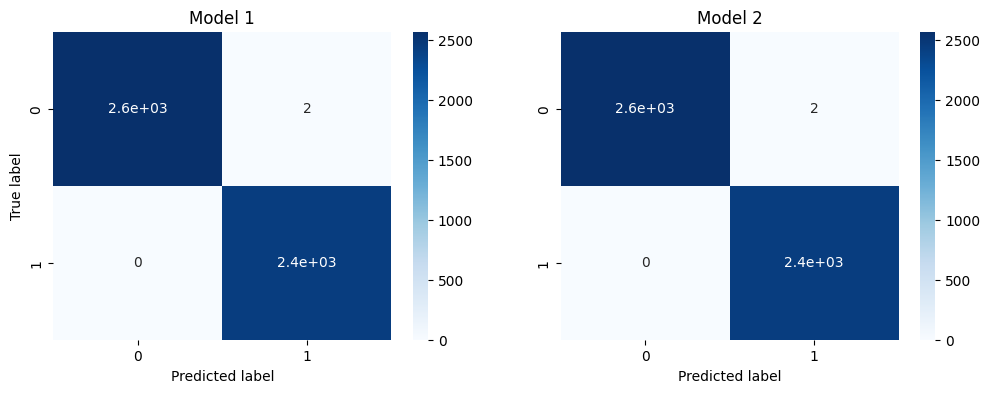

In [ ]:
# Logistic Regression Models Comparison
y_pred_lr1 = lr1.predict(X_test_bc)
y_pred_lr2 = lr2.predict(X_test_bc)

conf_matrix_model1 = confusion_matrix(y_test_bc, y_pred_lr1)
conf_matrix_model2 = confusion_matrix(y_test_bc, y_pred_lr2)

fig, axs = plt.subplots(1, 2, figsize = (12, 4))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0])
axs[0].set_title('Model 1')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1])
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')
plt.show()

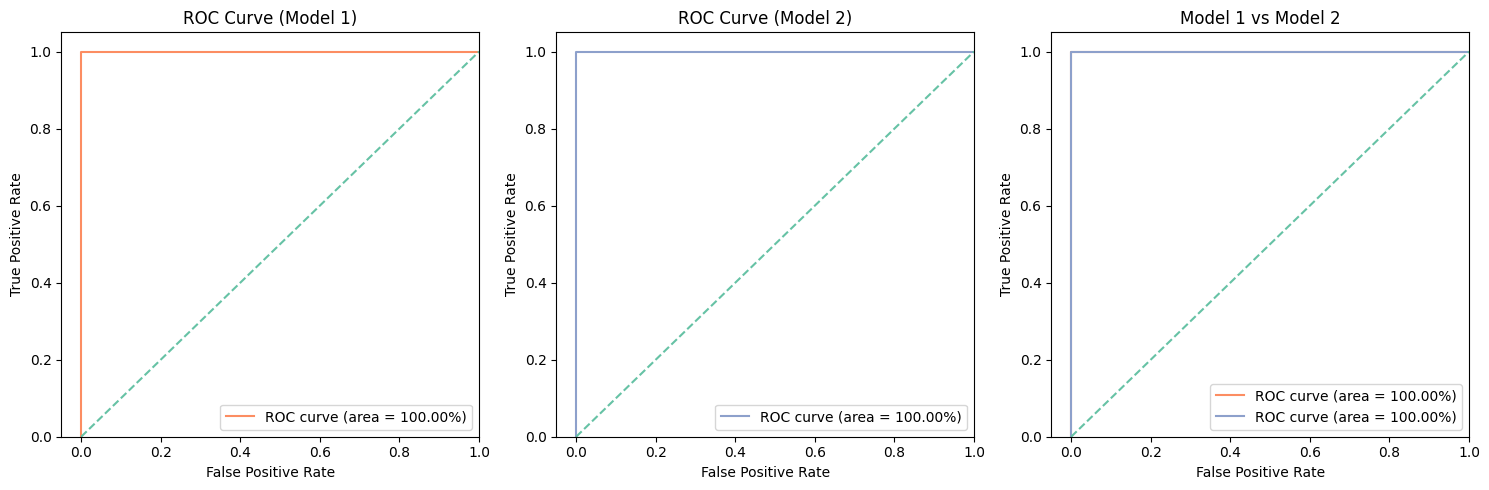

In [ ]:
y_prob_lr1 = lr1.predict_proba(X_test_bc)[:,1]
y_prob_lr2 = lr2.predict_proba(X_test_bc)[:,1]

fpr1, tpr1, _ = roc_curve(y_test_bc, y_prob_lr1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test_bc, y_prob_lr2)
roc_auc2 = auc(fpr2, tpr2)

colors = sns.color_palette('Set2', n_colors = 3)
fig, axes = plt.subplots(1, 3, figsize = (15, 5))

axes[0].plot(fpr1, tpr1, label = f'ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[0].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[0].set_xlim([-0.05, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve (Model 1)')
axes[0].legend(loc = 'lower right')

axes[1].plot(fpr2, tpr2, label = f'ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[1].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[1].set_xlim([-0.05, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve (Model 2)')
axes[1].legend(loc = 'lower right')

axes[2].plot(fpr1, tpr1, label = f'ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[2].plot(fpr2, tpr2, label = f'ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[2].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[2].set_xlim([-0.05, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_title('Model 1 vs Model 2')
axes[2].legend(loc = 'lower right')

plt.tight_layout()
plt.show()

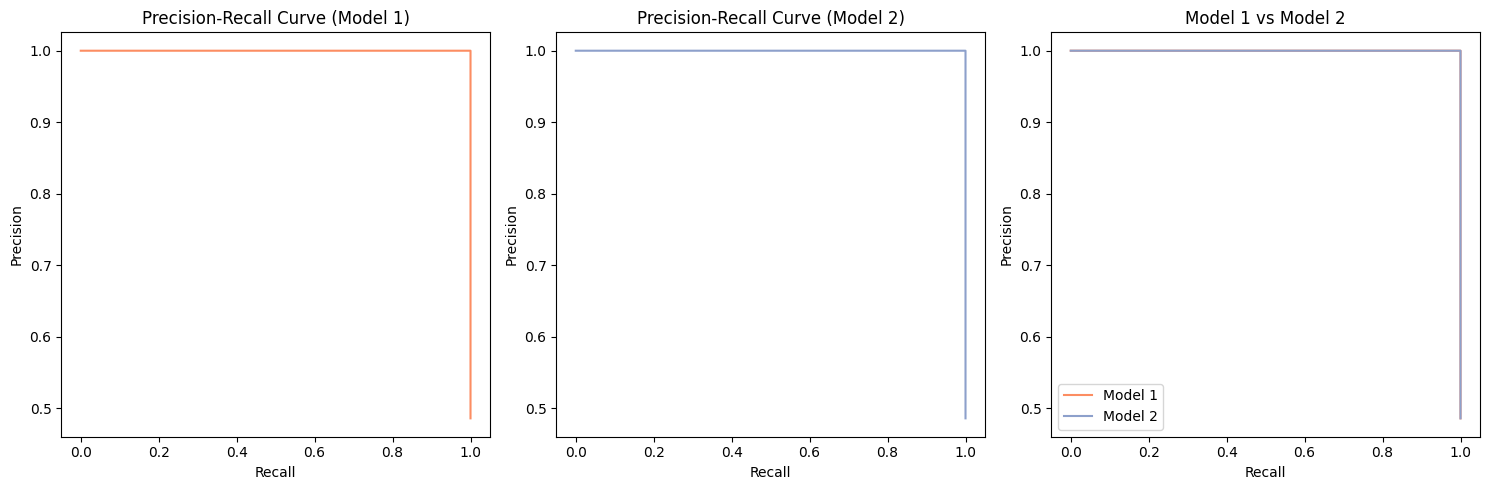

In [ ]:
precision1, recall1, threshold1 = precision_recall_curve(y_test_bc, y_prob_lr1)
precision2, recall2, threshold2 = precision_recall_curve(y_test_bc, y_prob_lr2)

fig, axs = plt.subplots(1, 3, figsize = (15, 5))

axs[0].plot(recall1, precision1, color = colors[1], label = 'Model 1')
axs[0].set_xlabel('Recall')
axs[0].set_ylabel('Precision')
axs[0].set_title('Precision-Recall Curve (Model 1)')

axs[1].plot(recall2, precision2, color = colors[2], label = 'Model 2')
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].set_title('Precision-Recall Curve (Model 2)')

axs[2].plot(recall1, precision1, color = colors[1], label = 'Model 1')
axs[2].plot(recall2, precision2, color = colors[2], label = 'Model 2')
axs[2].set_xlabel('Recall')
axs[2].set_ylabel('Precision')
axs[2].set_title('Model 1 vs Model 2')
axs[2].legend(loc = 'lower left')

plt.tight_layout()
plt.show()

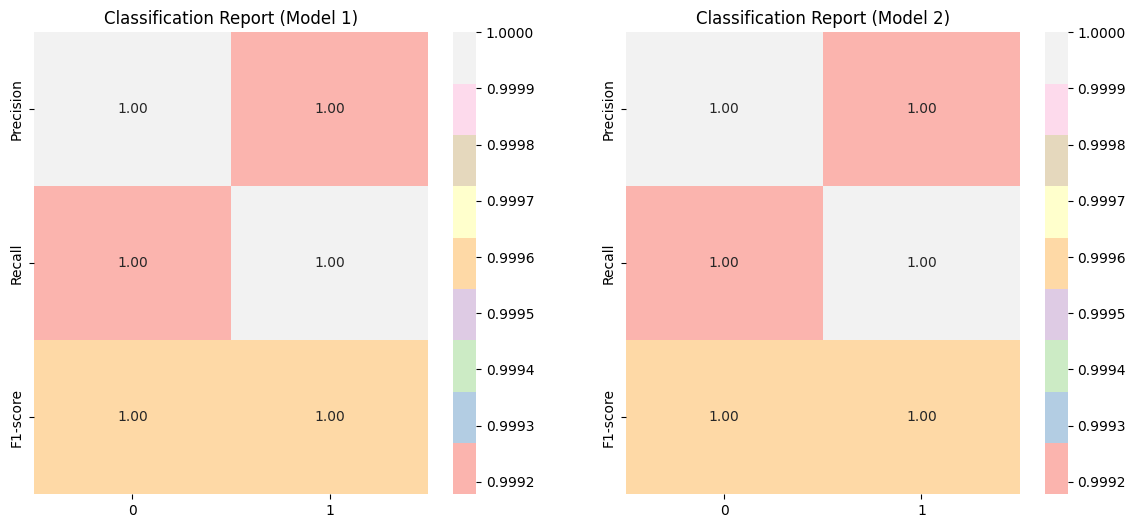

In [ ]:
target_names = lr1.classes_
metrics1 = classification_report(y_true = y_test_bc, y_pred = y_pred_lr1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test_bc, y_pred = y_pred_lr2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap='Pastel1', annot = True, fmt='.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
plt.show()

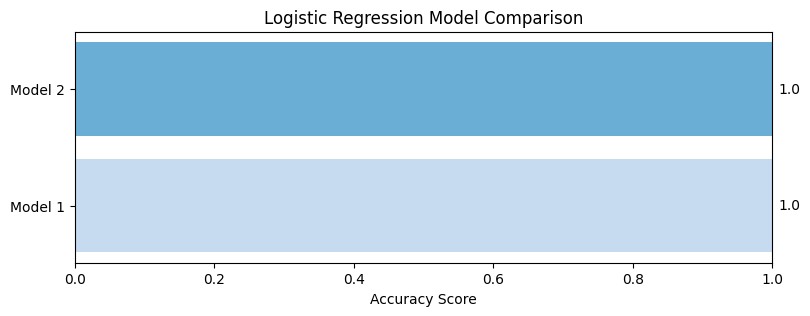

In [ ]:
palette = sns.color_palette('Blues', n_colors = 3)

acc1 = accuracy_score(y_pred_lr1, y_test_bc)
acc2 = accuracy_score(y_pred_lr2, y_test_bc)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Logistic Regression Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

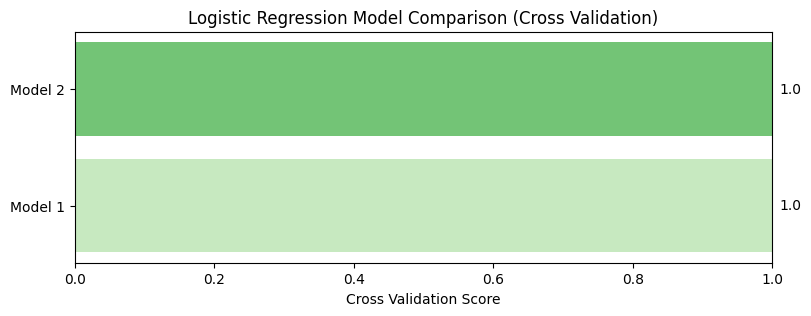

In [ ]:
palette = sns.color_palette('Greens', n_colors = 3)

labels = ['Model 1', 'Model 2']
scores = [cv_lr1.mean(), cv_lr2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Logistic Regression Model Comparison (Cross Validation)')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

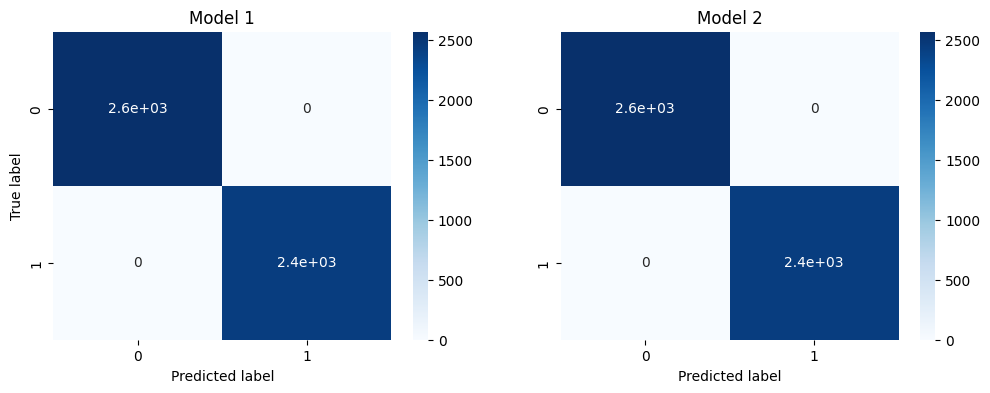

In [ ]:
# Support Vector Machine Models Comparison
y_pred_svm1 = svm1.predict(X_test_bc)
y_pred_svm2 = svm2.predict(X_test_bc)

conf_matrix_model1 = confusion_matrix(y_test_bc, y_pred_svm1)
conf_matrix_model2 = confusion_matrix(y_test_bc, y_pred_svm2)

fig, axs = plt.subplots(1, 2, figsize = (12, 4))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0])
axs[0].set_title('Model 1')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1])
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')
plt.show()

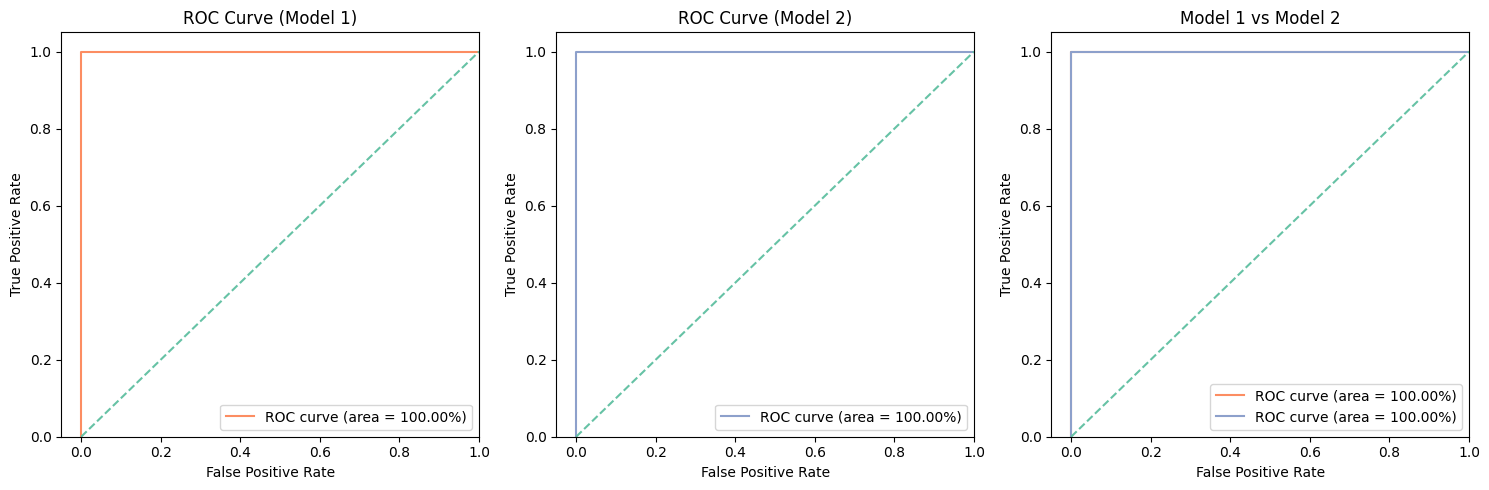

In [ ]:
y_prob_svm1 = svm1.predict_proba(X_test_bc)[:,1]
y_prob_svm2 = svm2.predict_proba(X_test_bc)[:,1]

fpr1, tpr1, _ = roc_curve(y_test_bc, y_prob_svm1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test_bc, y_prob_svm2)
roc_auc2 = auc(fpr2, tpr2)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))

axes[0].plot(fpr1, tpr1, label = f'ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[0].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[0].set_xlim([-0.05, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve (Model 1)')
axes[0].legend(loc = 'lower right')

axes[1].plot(fpr2, tpr2, label = f'ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[1].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[1].set_xlim([-0.05, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve (Model 2)')
axes[1].legend(loc = 'lower right')

axes[2].plot(fpr1, tpr1, label = f'ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[2].plot(fpr2, tpr2, label = f'ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[2].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[2].set_xlim([-0.05, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_title('Model 1 vs Model 2')
axes[2].legend(loc = 'lower right')

plt.tight_layout()
plt.show()

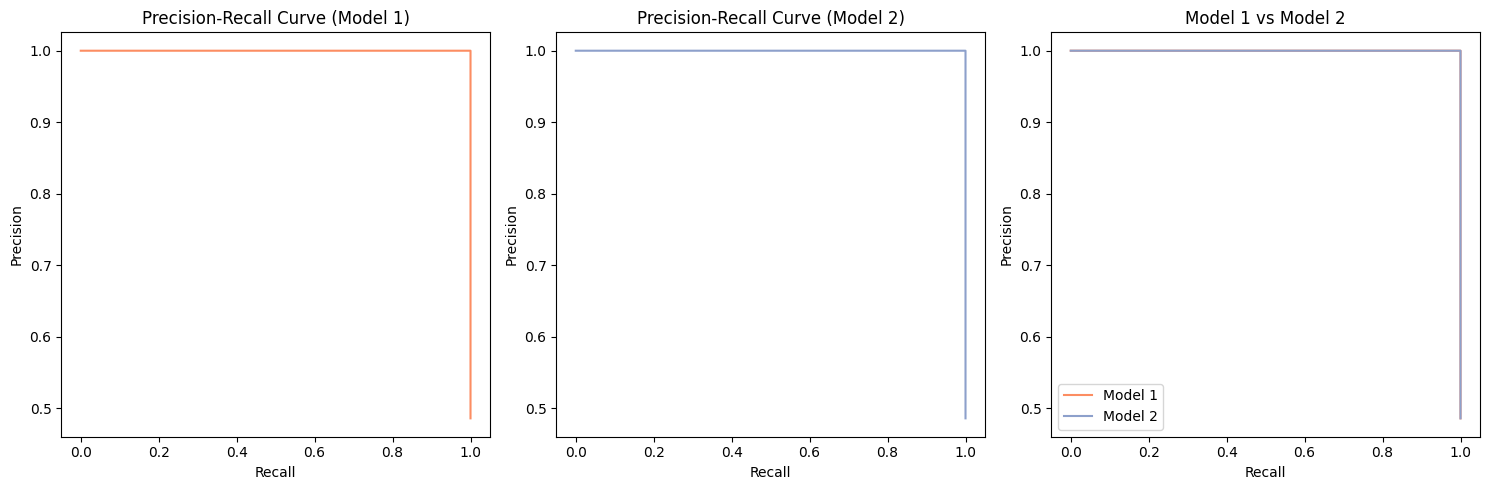

In [ ]:
precision1, recall1, threshold1 = precision_recall_curve(y_test_bc, y_prob_svm1)
precision2, recall2, threshold2 = precision_recall_curve(y_test_bc, y_prob_svm2)

fig, axs = plt.subplots(1, 3, figsize = (15, 5))

axs[0].plot(recall1, precision1, color = colors[1])
axs[0].set_xlabel('Recall')
axs[0].set_ylabel('Precision')
axs[0].set_title('Precision-Recall Curve (Model 1)')

axs[1].plot(recall2, precision2, color = colors[2])
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].set_title('Precision-Recall Curve (Model 2)')

axs[2].plot(recall1, precision1, color = colors[1], label = 'Model 1')
axs[2].plot(recall2, precision2, color = colors[2], label = 'Model 2')
axs[2].set_xlabel('Recall')
axs[2].set_ylabel('Precision')
axs[2].set_title('Model 1 vs Model 2')
axs[2].legend(loc = 'lower left')

plt.tight_layout()
plt.show()

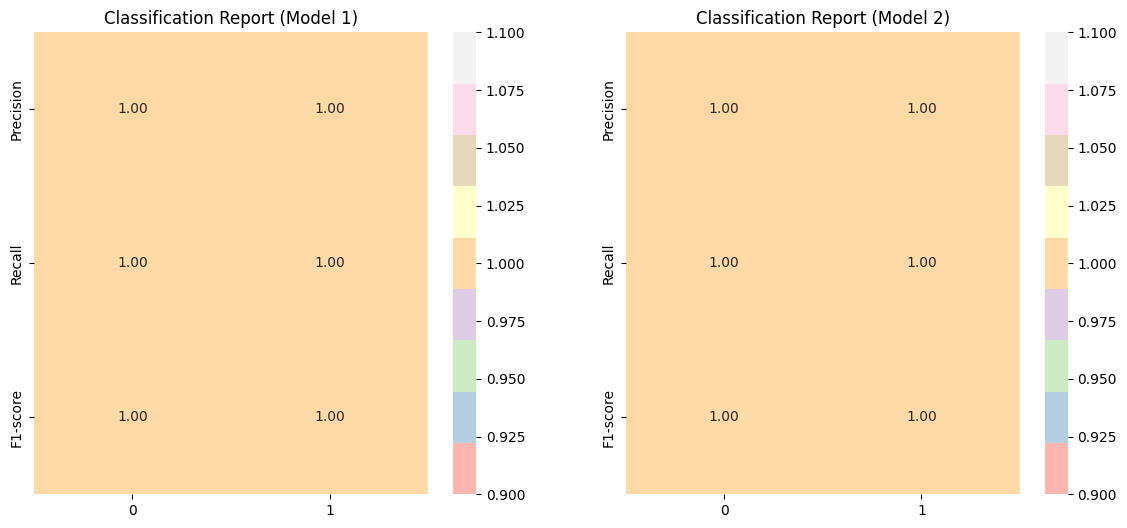

In [ ]:
target_names = svm1.classes_
metrics1 = classification_report(y_true = y_test_bc, y_pred = y_pred_svm1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test_bc, y_pred = y_pred_svm2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
plt.show()

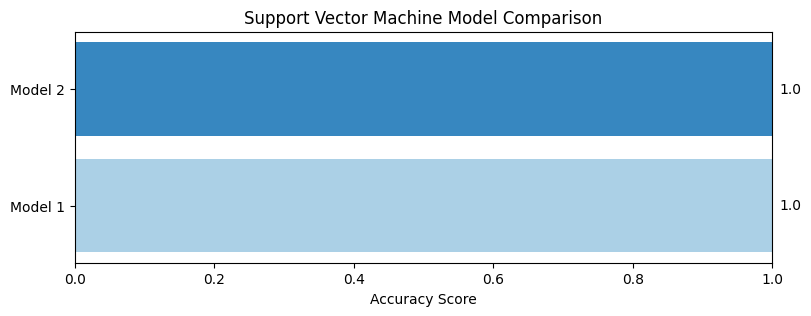

In [ ]:
palette = sns.color_palette('Blues', n_colors = 2)

acc1 = accuracy_score(y_pred_svm1, y_test_bc)
acc2 = accuracy_score(y_pred_svm2, y_test_bc)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Support Vector Machine Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

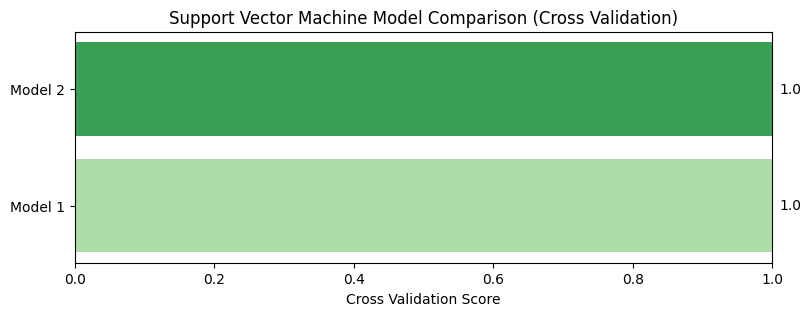

In [ ]:
palette = sns.color_palette('Greens', n_colors = 2)

labels = ['Model 1', 'Model 2']
scores = [cv_svm1.mean(), cv_svm2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Support Vector Machine Model Comparison (Cross Validation)')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

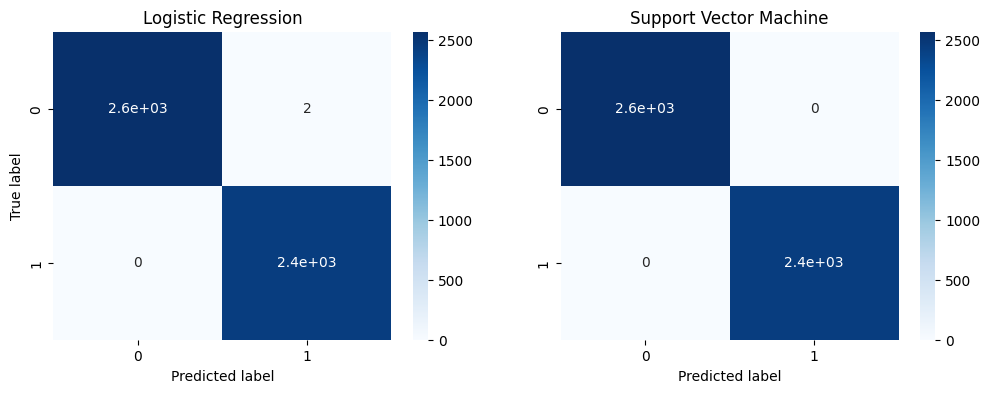

In [ ]:
# Comparison of the Binary Classification Algorithms
conf_matrix_model1 = confusion_matrix(y_test_bc, y_pred_lr2)
conf_matrix_model2 = confusion_matrix(y_test_bc, y_pred_svm2)

fig, axs = plt.subplots(1, 2, figsize = (12, 4))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0])
axs[0].set_title('Logistic Regression')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1])
axs[1].set_title('Support Vector Machine')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')
plt.show()

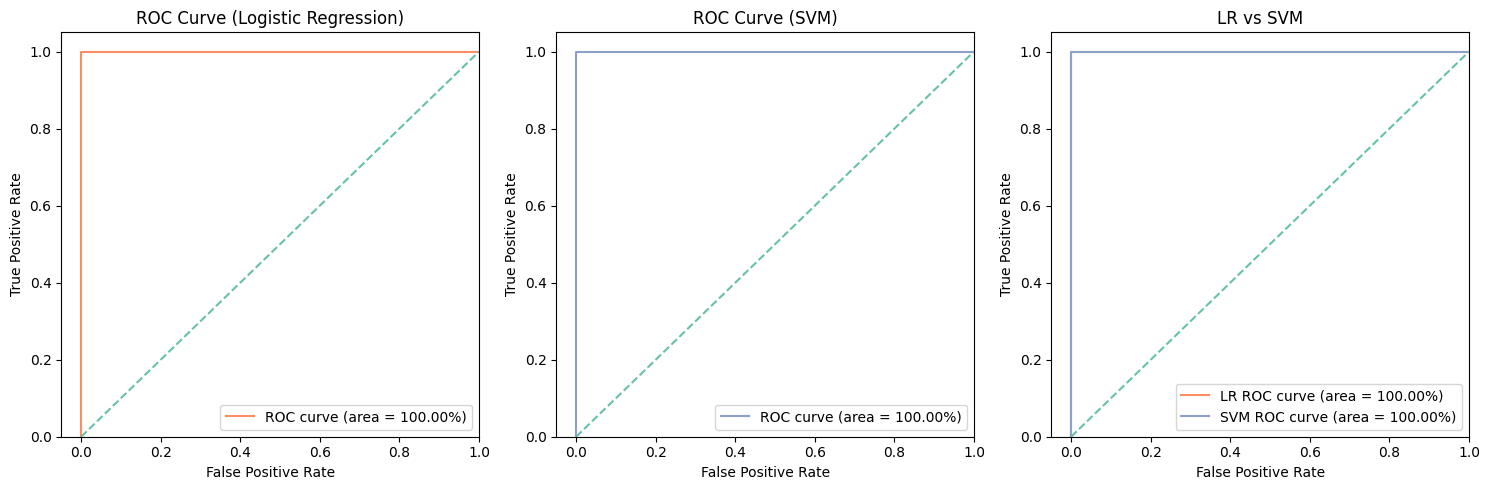

In [ ]:
fpr1, tpr1, _ = roc_curve(y_test_bc, y_prob_lr2)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test_bc, y_prob_svm2)
roc_auc2 = auc(fpr2, tpr2)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))

axes[0].plot(fpr1, tpr1, label = f'ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[0].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[0].set_xlim([-0.05, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve (Logistic Regression)')
axes[0].legend(loc = 'lower right')

axes[1].plot(fpr2, tpr2, label = f'ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[1].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[1].set_xlim([-0.05, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve (SVM)')
axes[1].legend(loc = 'lower right')

axes[2].plot(fpr1, tpr1, label = f'LR ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[2].plot(fpr2, tpr2, label = f'SVM ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[2].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[2].set_xlim([-0.05, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_title('LR vs SVM')
axes[2].legend(loc = 'lower right')

plt.tight_layout()
plt.show()

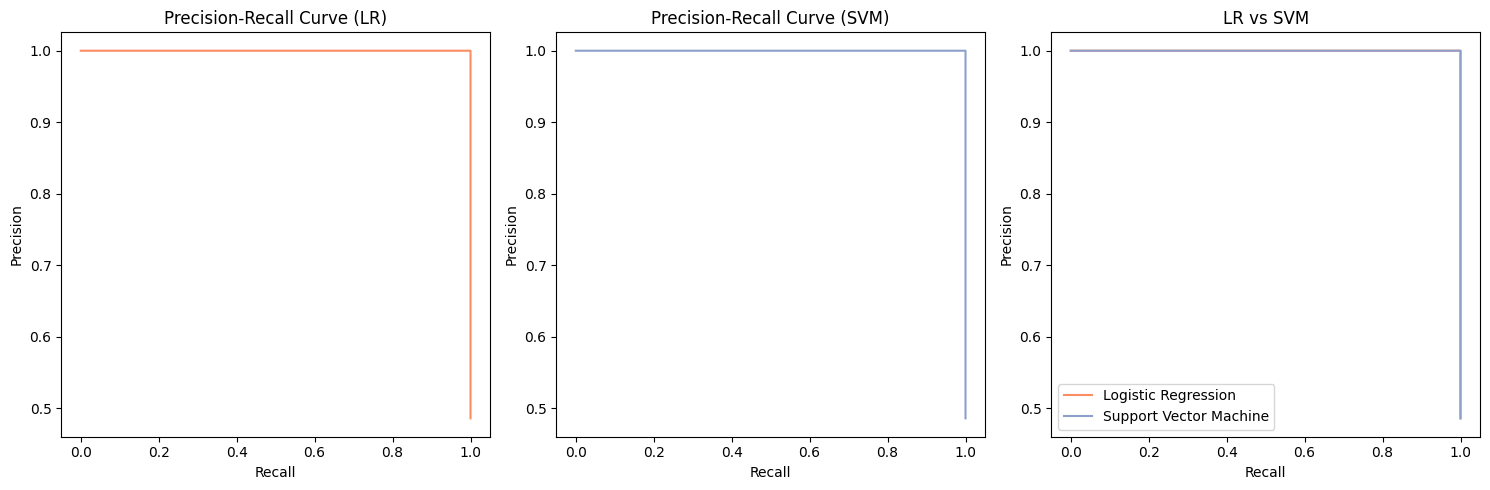

In [ ]:
precision1, recall1, threshold1 = precision_recall_curve(y_test_bc, y_prob_lr2)
precision2, recall2, threshold2 = precision_recall_curve(y_test_bc, y_prob_svm2)

fig, axs = plt.subplots(1, 3, figsize = (15, 5))

axs[0].plot(recall1, precision1, color = colors[1], label = 'Model 1')
axs[0].set_xlabel('Recall')
axs[0].set_ylabel('Precision')
axs[0].set_title('Precision-Recall Curve (LR)')

axs[1].plot(recall2, precision2, color = colors[2], label = 'Model 2')
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].set_title('Precision-Recall Curve (SVM)')

axs[2].plot(recall1, precision1, color = colors[1], label = 'Logistic Regression')
axs[2].plot(recall2, precision2, color = colors[2], label = 'Support Vector Machine')
axs[2].set_xlabel('Recall')
axs[2].set_ylabel('Precision')
axs[2].set_title('LR vs SVM')
axs[2].legend(loc = 'lower left')

plt.tight_layout()
plt.show()

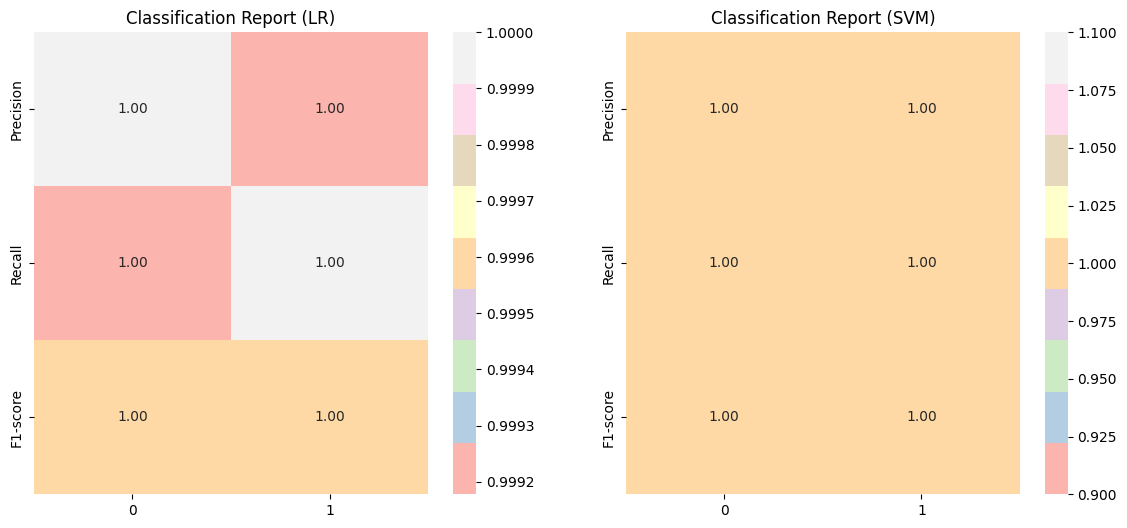

In [ ]:
target_names = svm2.classes_
metrics1 = classification_report(y_true = y_test_bc, y_pred = y_pred_lr2, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test_bc, y_pred = y_pred_svm2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax=axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax=axs[1])
axs[0].set_title('Classification Report (LR)')
axs[1].set_title('Classification Report (SVM)')
plt.show()

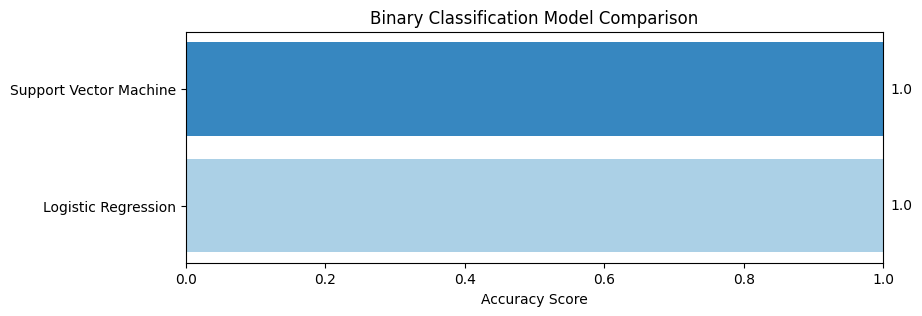

In [ ]:
palette = sns.color_palette('Blues', n_colors = 2)

acc1 = accuracy_score(y_pred_lr2, y_test_bc)
acc2 = accuracy_score(y_pred_svm2, y_test_bc)

labels = ['Logistic Regression', 'Support Vector Machine']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Binary Classification Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

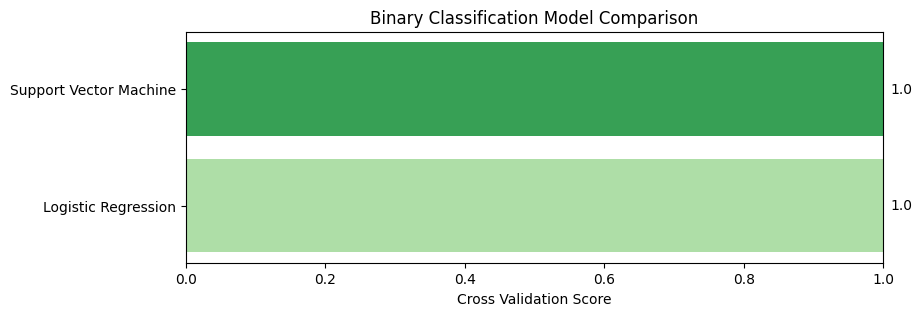

In [ ]:
palette = sns.color_palette('Greens', n_colors = 2)

labels = ['Logistic Regression', 'Support Vector Machine']
scores = [cv_lr2.mean(), cv_svm2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Binary Classification Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

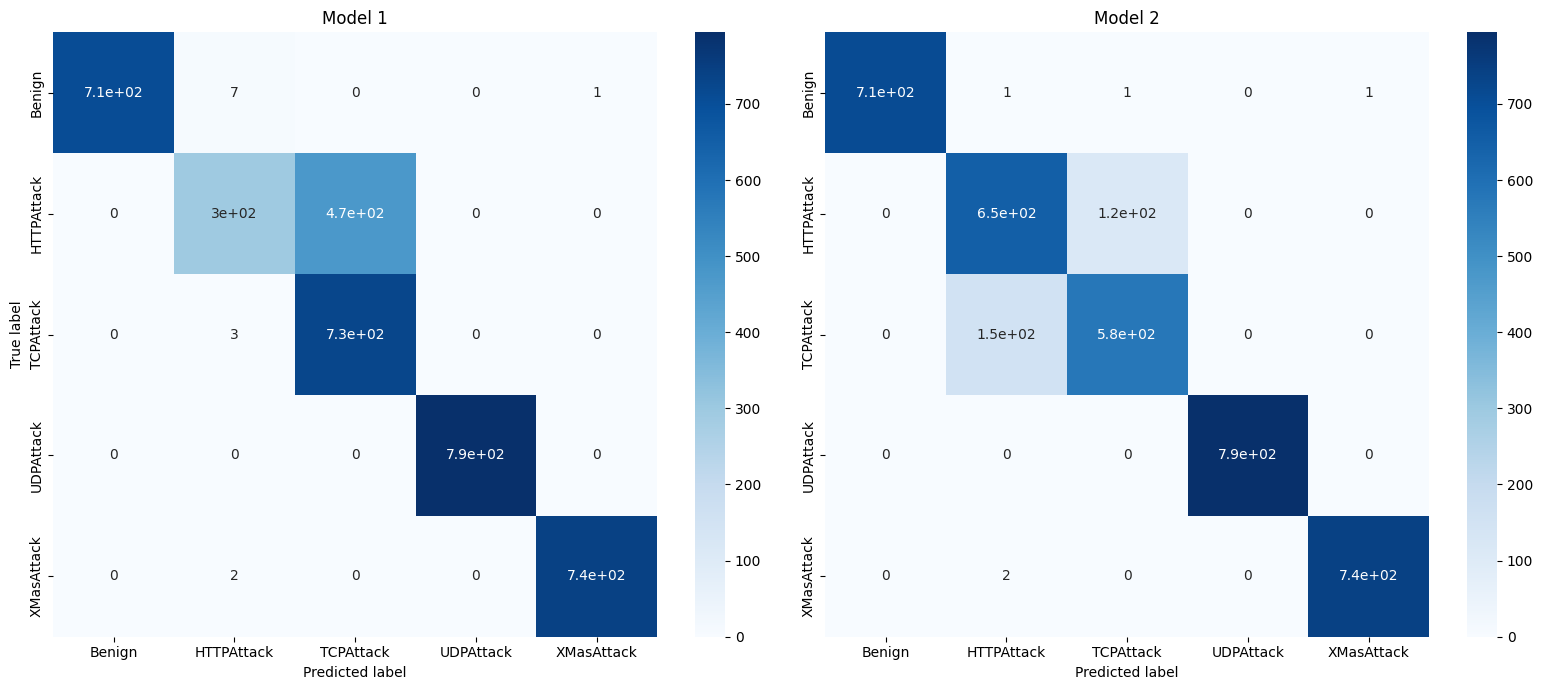

In [ ]:
# Random Forest Models Comparison
y_pred_rf1 = rf1.predict(X_test)
y_pred_rf2 = rf2.predict(X_test)

conf_matrix_model1 = confusion_matrix(y_test, y_pred_rf1)
conf_matrix_model2 = confusion_matrix(y_test, y_pred_rf2)

fig, axs = plt.subplots(1, 2, figsize = (16, 7))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0], xticklabels = rf1.classes_, yticklabels = rf1.classes_)
axs[0].set_title('Model 1')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1], xticklabels = rf2.classes_, yticklabels = rf2.classes_)
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')

fig.tight_layout()
plt.show()

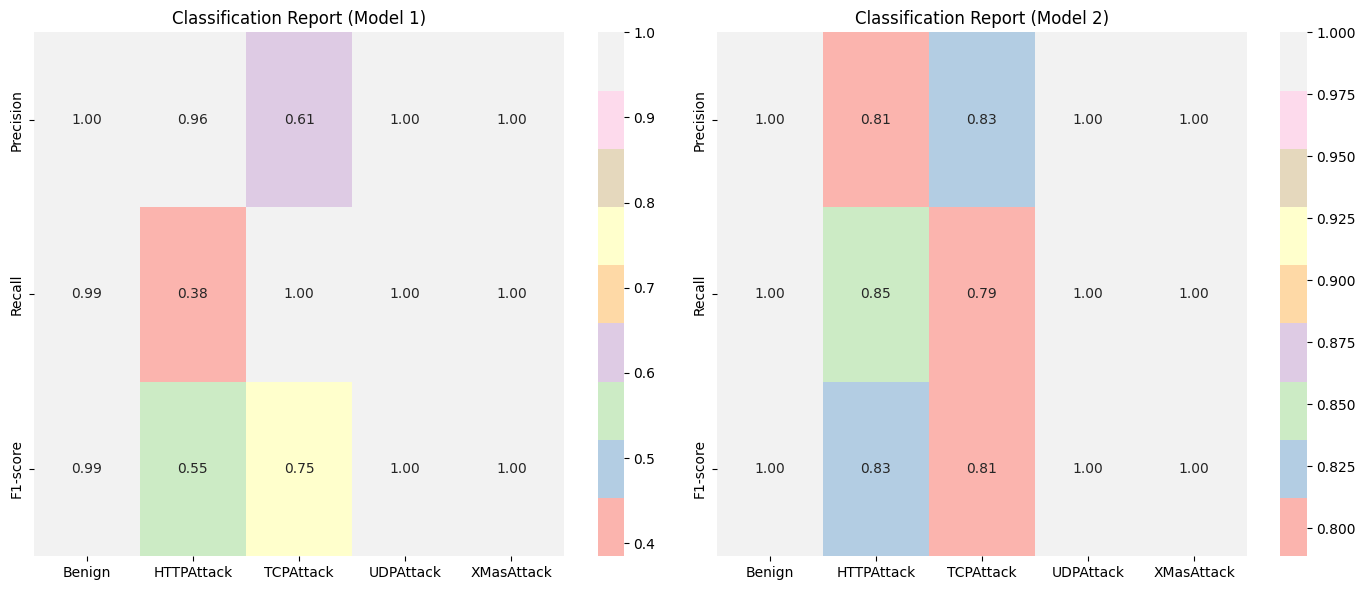

In [ ]:
target_names = rf1.classes_
metrics1 = classification_report(y_true = y_test, y_pred = y_pred_rf1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test, y_pred = y_pred_rf2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
fig.tight_layout()
plt.show()

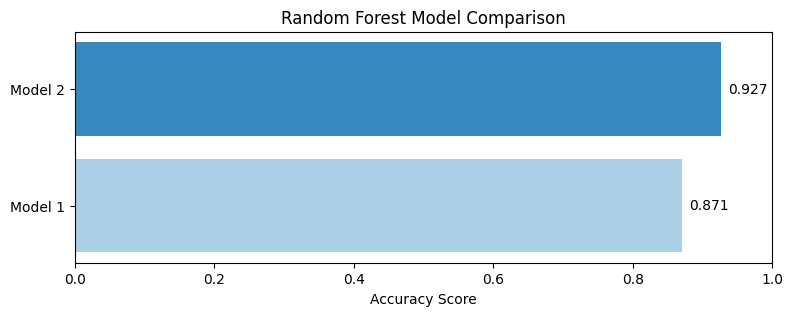

In [ ]:
palette = sns.color_palette('Blues', n_colors = 2)

acc1 = accuracy_score(y_pred_rf1, y_test)
acc2 = accuracy_score(y_pred_rf2, y_test)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Random Forest Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

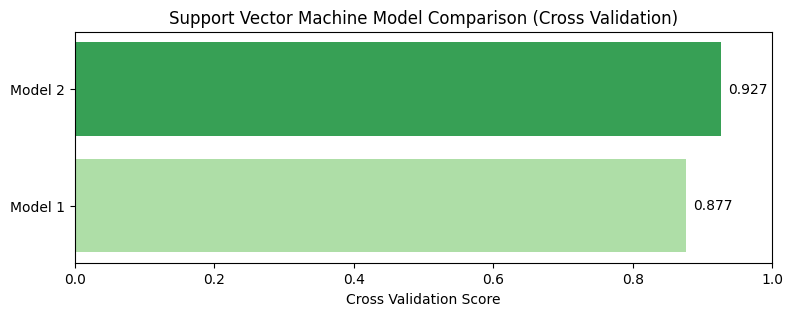

In [ ]:
palette = sns.color_palette('Greens', n_colors = 2)

labels = ['Model 1', 'Model 2']
scores = [cv_rf1.mean(), cv_rf2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Support Vector Machine Model Comparison (Cross Validation)')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()


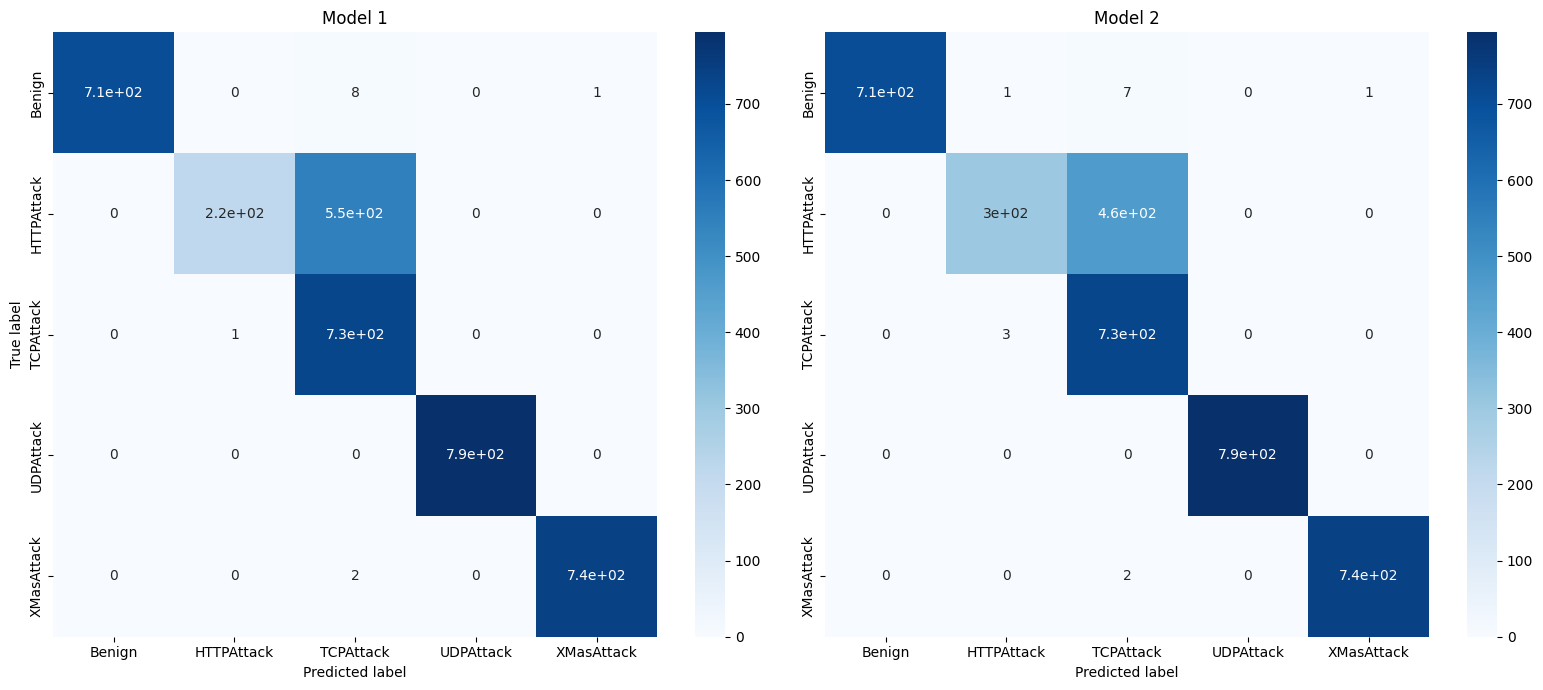

In [ ]:
# Decision Trees Models Comparison
y_pred_dt1 = dt1.predict(X_test)
y_pred_dt2 = dt2.predict(X_test)

conf_matrix_model1 = confusion_matrix(y_test, y_pred_dt1)
conf_matrix_model2 = confusion_matrix(y_test, y_pred_dt2)

fig, axs = plt.subplots(1, 2, figsize = (16, 7))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0], xticklabels = dt1.classes_, yticklabels = dt1.classes_)
axs[0].set_title('Model 1')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1], xticklabels = dt2.classes_, yticklabels = dt2.classes_)
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')

fig.tight_layout()
plt.show()

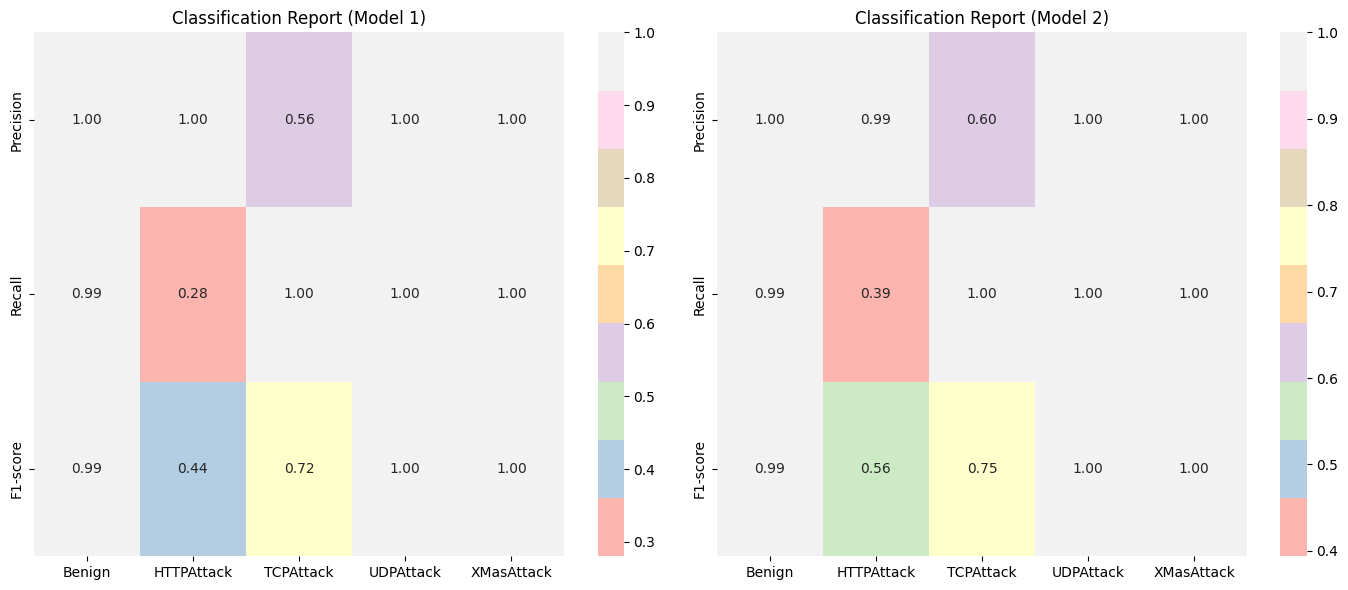

In [ ]:
target_names = dt1.classes_
metrics1 = classification_report(y_true = y_test, y_pred = y_pred_dt1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test, y_pred = y_pred_dt2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
fig.tight_layout()
plt.show()

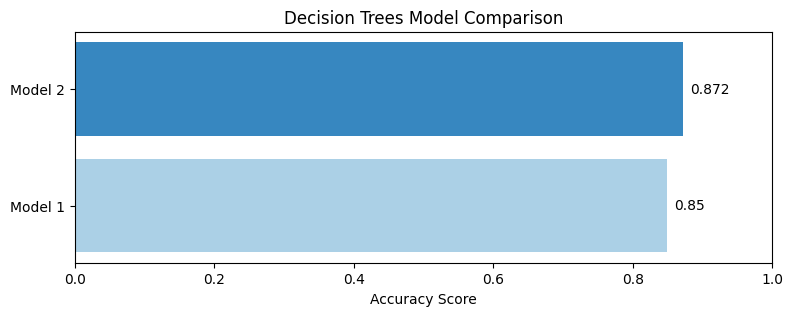

In [ ]:
palette = sns.color_palette('Blues', n_colors = 2)

acc1 = accuracy_score(y_pred_dt1, y_test)
acc2 = accuracy_score(y_pred_dt2, y_test)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Decision Trees Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

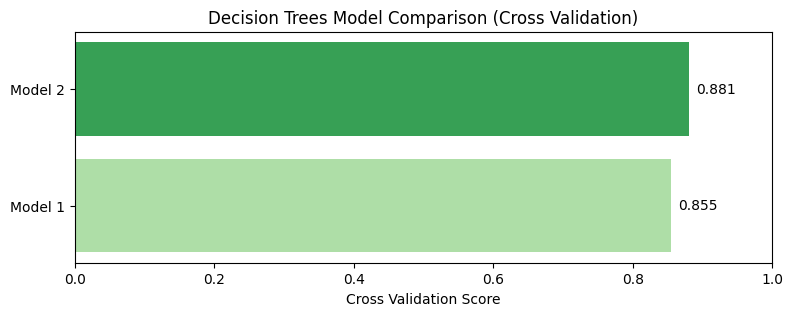

In [ ]:
palette = sns.color_palette('Greens', n_colors = 2)

labels = ['Model 1', 'Model 2']
scores = [cv_dt1.mean(), cv_dt2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Decision Trees Model Comparison (Cross Validation)')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

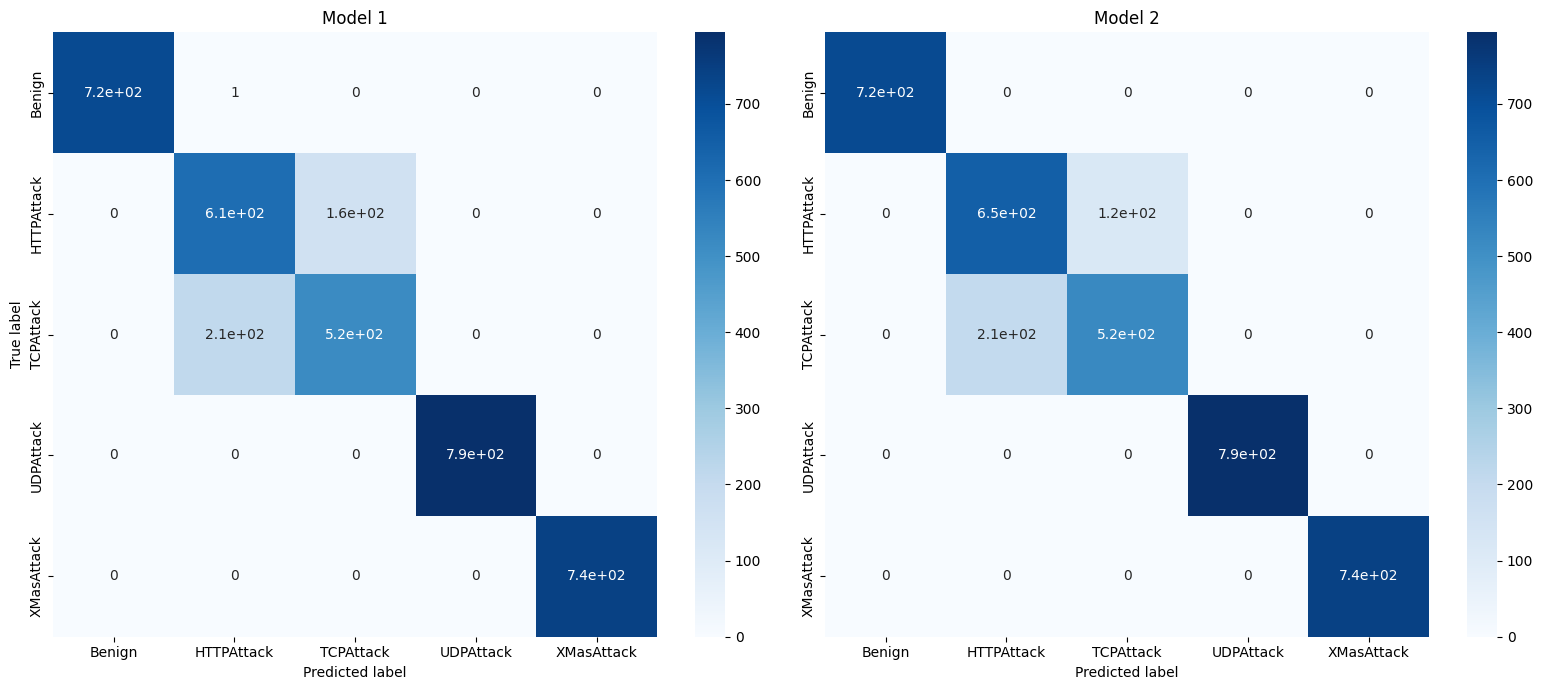

In [ ]:
# K Nearest Neighbours Models Comparison
y_pred_knn1 = knn1.predict(X_test)
y_pred_knn2 = knn2.predict(X_test)

conf_matrix_model1 = confusion_matrix(y_test, y_pred_knn1)
conf_matrix_model2 = confusion_matrix(y_test, y_pred_knn2)

fig, axs = plt.subplots(1, 2, figsize = (16, 7))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0], xticklabels = knn1.classes_, yticklabels = knn1.classes_)
axs[0].set_title('Model 1')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1], xticklabels = knn2.classes_, yticklabels = knn2.classes_)
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')

fig.tight_layout()
plt.show()

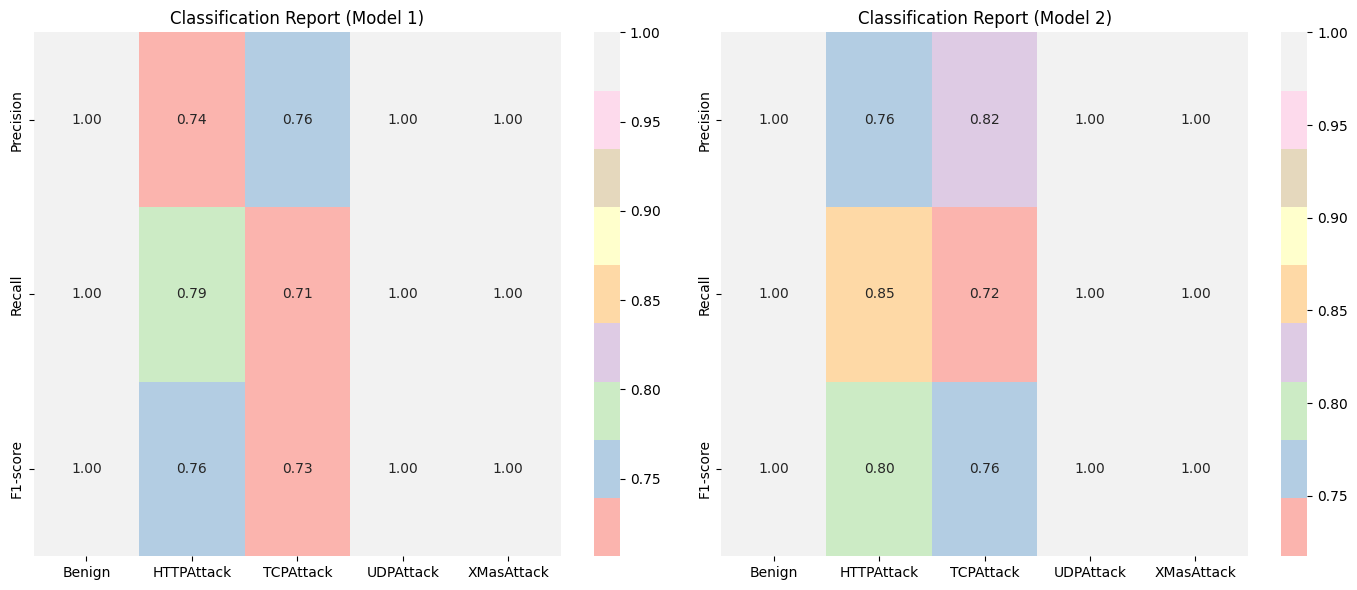

In [ ]:
target_names = knn1.classes_
metrics1 = classification_report(y_true = y_test, y_pred = y_pred_knn1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test, y_pred = y_pred_knn2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
fig.tight_layout()
plt.show()

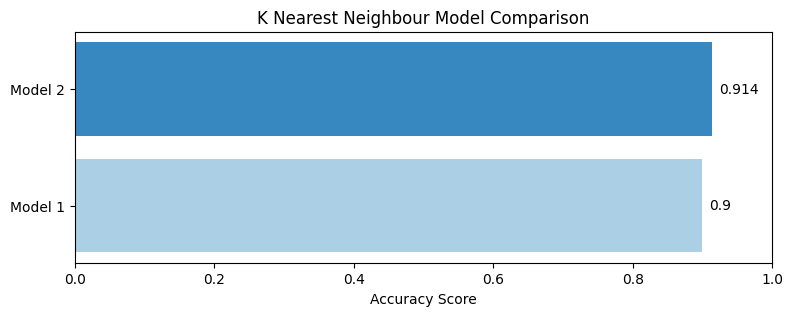

In [ ]:
palette = sns.color_palette('Blues', n_colors = 2)

acc1 = accuracy_score(y_pred_knn1, y_test)
acc2 = accuracy_score(y_pred_knn2, y_test)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('K Nearest Neighbour Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

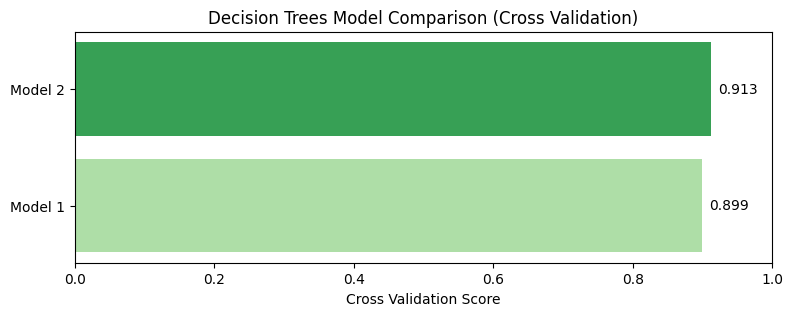

In [ ]:
palette = sns.color_palette('Greens', n_colors = 2)

labels = ['Model 1', 'Model 2']
scores = [cv_knn1.mean(), cv_knn2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Decision Trees Model Comparison (Cross Validation)')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

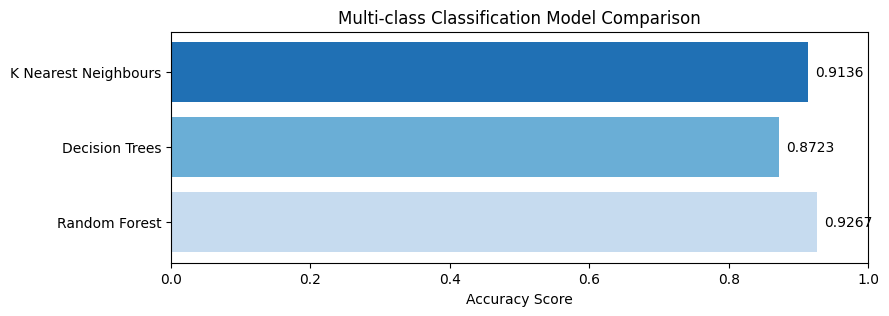

In [ ]:
# Comparison of the Multi-class Classification Algorithms
palette = sns.color_palette('Blues', n_colors = 3)

rf_acc = accuracy_score(y_pred_rf2, y_test)
dt_acc = accuracy_score(y_pred_dt2, y_test)
knn_acc = accuracy_score(y_pred_knn2, y_test)

labels = ['Random Forest', 'Decision Trees', 'K Nearest Neighbours']
scores = [rf_acc, dt_acc, knn_acc]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Multi-class Classification Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 4)), ha = 'left', va = 'center')

plt.show()

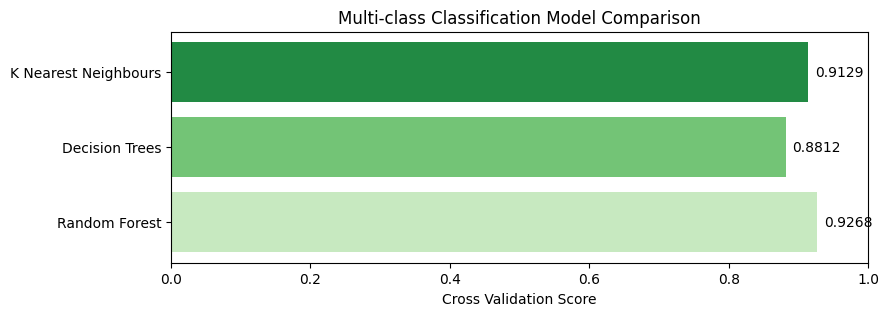

In [ ]:
palette = sns.color_palette('Greens', n_colors = 3)

labels = ['Random Forest', 'Decision Trees', 'K Nearest Neighbours']
scores = [cv_rf2.mean(), cv_dt2.mean(), cv_knn2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Multi-class Classification Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 4)), ha = 'left', va = 'center')

plt.show()

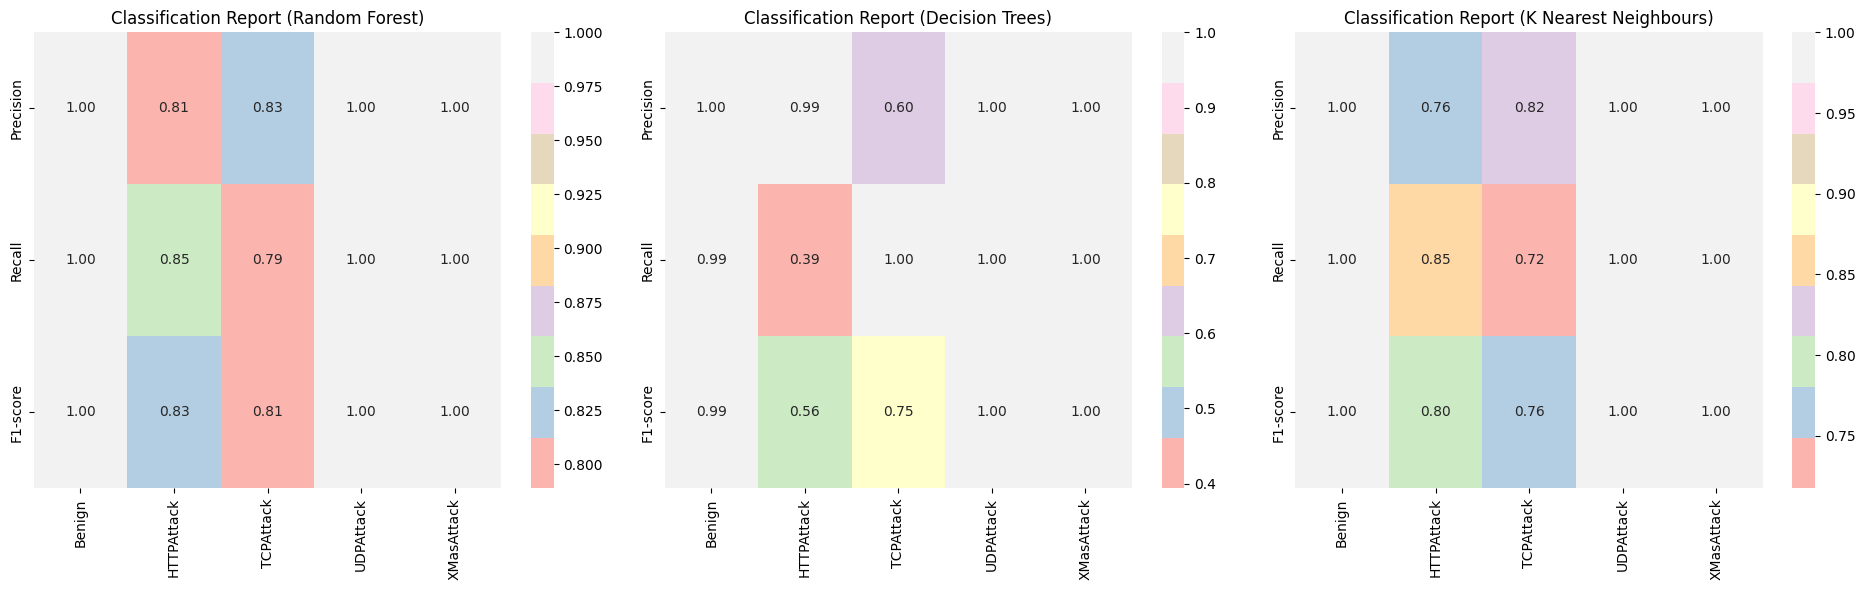

In [ ]:
target_names = rf2.classes_
preds = [y_pred_rf2, y_pred_dt2, y_pred_knn2]

datas = []
for pred in preds:
    metrics = classification_report(y_true = y_test, y_pred = pred, target_names = target_names, output_dict = True)
    precision = [metrics[target_name]['precision'] for target_name in target_names]
    recall = [metrics[target_name]['recall'] for target_name in target_names]
    f1_score = [metrics[target_name]['f1-score'] for target_name in target_names]

    datas.append(np.array([precision, recall, f1_score]))

rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 3, figsize = (19, 6))
sns.heatmap(datas[0], cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(datas[1], cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
sns.heatmap(datas[2], cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[2])

axs[0].set_title('Classification Report (Random Forest)')
axs[1].set_title('Classification Report (Decision Trees)')
axs[2].set_title('Classification Report (K Nearest Neighbours)')
fig.tight_layout()
plt.show()

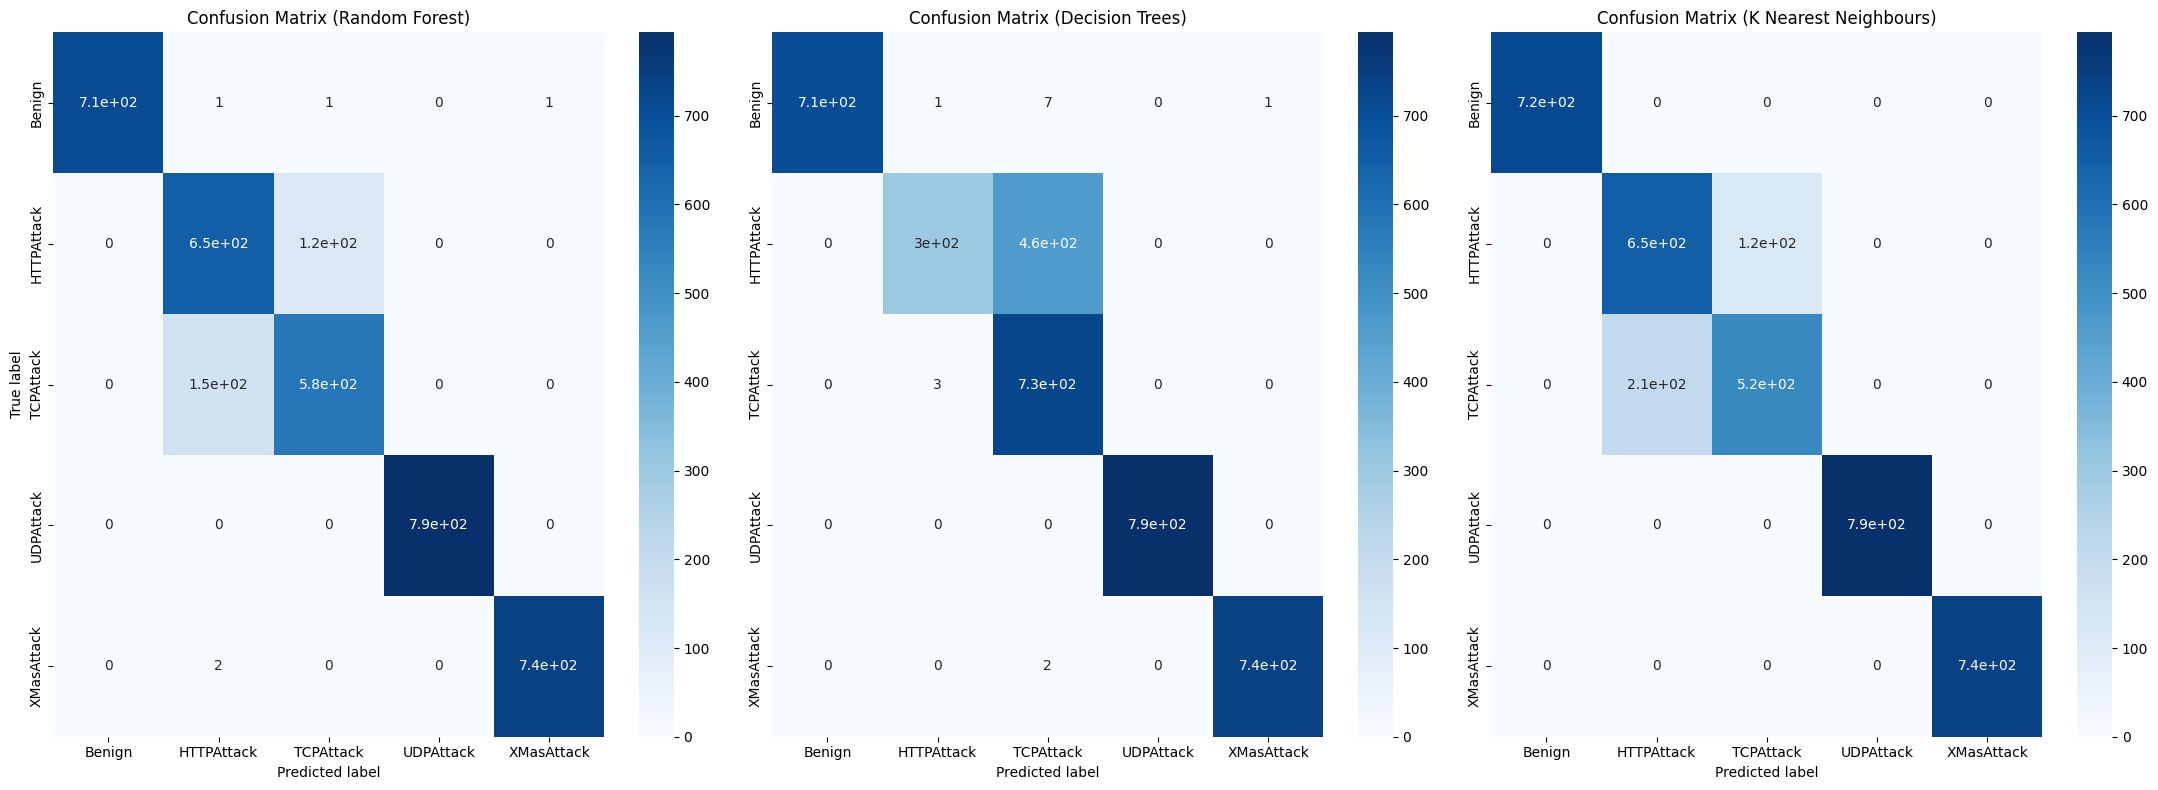

In [ ]:
preds = [y_pred_rf2, y_pred_dt2, y_pred_knn2]

conf_matrix = [confusion_matrix(y_test, y_pred) for y_pred in preds]

fig, axs = plt.subplots(1, 3, figsize = (22, 8))

sns.heatmap(conf_matrix[0], annot = True, cmap = 'Blues', ax = axs[0], xticklabels = dt1.classes_, yticklabels = dt1.classes_)
sns.heatmap(conf_matrix[1], annot = True, cmap = 'Blues', ax = axs[1], xticklabels = dt1.classes_, yticklabels = dt1.classes_)
sns.heatmap(conf_matrix[2], annot = True, cmap = 'Blues', ax = axs[2], xticklabels = dt1.classes_, yticklabels = dt1.classes_)

axs[0].set_title('Confusion Matrix (Random Forest)')
axs[1].set_title('Confusion Matrix (Decision Trees)')
axs[2].set_title('Confusion Matrix (K Nearest Neighbours)')

axs[0].set_xlabel('Predicted label')
axs[1].set_xlabel('Predicted label')
axs[2].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')

fig.tight_layout()
plt.show()